## DS102 Project - Hotel Performance Analysis and Prediction

#### Project Group 9
<b>Team members:</b>
1. Chua Kian Wee
2. Rachel Zhao
3. Koh Rui Xin
4. Josey Tan
5. Grace Soh

### Problem Statement
Prior to the global spread of Covid-19 in 2020, the hotel industry in Singapore was largely dependent on foreign tourists for revenue. As the budget and preferences of tourist group demographics vary, demand for differing hotel tiers (Luxury/Upscale/Mid-tier/Economy) are higher during various quarters of the year.

Our analysis aims to understand the factors impacting hotel performance for each quarter of the year. This information can be useful for hotel managers and the sales and marketing team to plan resources, pricing and other strategies during various periods of the year to attract more guests and travellers in boosting overall hotel performance. This information can also be useful for developers when building new hotels or refurbishing older establishments.

This information can be useful in predicting potential hotel peformance when international travel return to pre Covid-19 levels.



### Datasets

#### (1) Monthly Gazetted Hotel Statistics by Hotel Tier

URL: https://data.gov.sg/dataset/monthly-gazetted-hotel-statistics-by-hotel-tier

File type: CSV

Period: 2013-2015

Categories: Tier, Standard Average Occupancy Rate (AOR), Standard Average Room Rate (ARR), Revenue Per Available Room (RevPAR)

This dataset shows statistics of standard average occupancy rate (AOR), standard average room rates (ARR) and revenue per available room (RevPAR) by hotel tier. The hotel tiering system is a reference system developed by the Singapore Tourism Board (STB) to categorise the different hotels in Singapore into tiers based on a combination of factors that include average room rates, location and product characteristics. The current hotel tiers published are based on the hotels' performance in 2015. 2015 Figures for the hotel industry are preliminary estimates. 

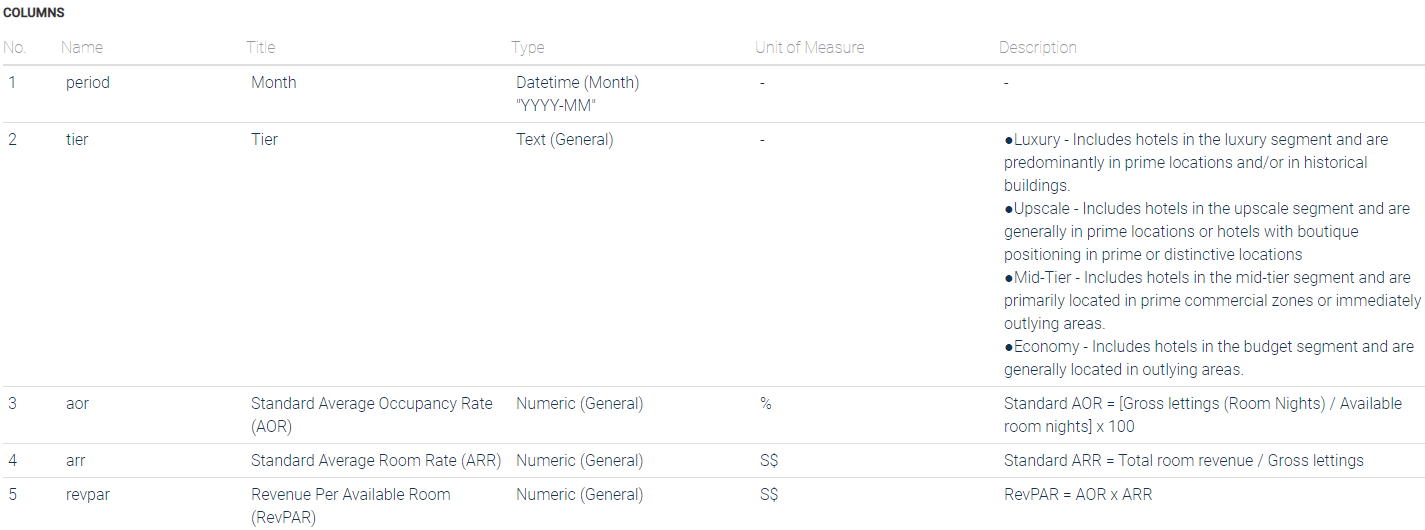

#### (2) International Visitor Arrivals by Country of Nationality

URL: https://data.gov.sg/dataset/international-visitor-arrivals-by-country-of-nationality

File type: CSV

Period: 2013-2014

Categories: Region, Country of Nationality, International Visitor Arrivals

This dataset shows the total number of visitor arrivals by region / country of nationality for the range of period selected.

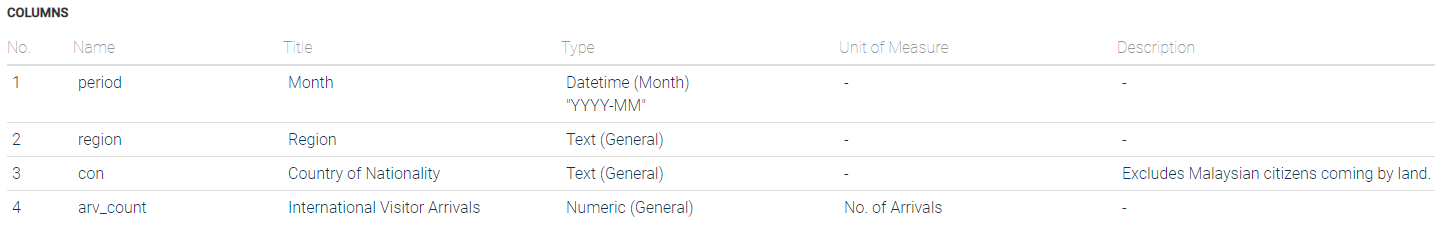

### Imported Libraries

In [1]:
# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# For dataframes and statistical analysis
import pandas as pd
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors
%matplotlib inline
import seaborn as sns

# For regression and prediction
from sklearn.model_selection import train_test_split # dataframe splitting
from sklearn.linear_model import LinearRegression # linear regression model
from sklearn.metrics import r2_score # model scoring metric

### Data Cleaning
Before performing analysis of the datasets, we first tried to make sense of the data through the following approach:-
1. Reading the Datasets, and understanding the shape and datatypes per column
2. Identifying unique values in each column
3. Descriptive analysis of our data where possible
4. Identifying and removing unnecessary columns, rows and null values in the dataset

#### 1. Reading the Datasets, and understanding the shape and datatypes per column

#### <i>Insights:</i>
<u> Hotel Statistics Data </u><br>
i. The dataset consists of 5 columns and 144 rows of data<br>
ii. Datatypes per column consist of float and object
<p><u> International Arrivals Data </u><br>
i. The dataset consists of 4 columns and 1,344 rows of data<br>
ii. Datatypes per column consist of integer and object<br>

In [2]:
#Read Data
hotel_tier_df = pd.read_csv('monthly-gazetted-hotel-statistics-by-tier.csv')
arrivals_df = pd.read_csv('international-visitor-arrivals-by-country-of-nationality.csv')
# Display Data information
display(hotel_tier_df[:3])
display(hotel_tier_df.info())
display(arrivals_df[:3])
display(arrivals_df.info())

,period,tier,aor,arr,revpar
0,2013-01,ECONOMY,83.4,100.4,83.7
1,2013-01,LUXURY,85.1,424.2,361.2
2,2013-01,MID-TIER,84.3,188.2,158.6


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 5 columns):
period    144 non-null object
tier      144 non-null object
aor       144 non-null float64
arr       144 non-null float64
revpar    144 non-null float64
dtypes: float64(3), object(2)
memory usage: 5.7+ KB


None

,period,region,con,arv_count
0,2013-01,Americas,Canada,13080
1,2013-01,Americas,USA,48815
2,2013-01,Americas,Other Countries in Americas,6742


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1344 entries, 0 to 1343
Data columns (total 4 columns):
period       1344 non-null object
region       1344 non-null object
con          1344 non-null object
arv_count    1344 non-null int64
dtypes: int64(1), object(3)
memory usage: 42.1+ KB


None

#### 2. Identifying unique values in each column

#### <i>Insights:</i>
<u> Hotel Statistics Data </u><br>
i. There are 4 unique hotel tiers namely Economy, Mid-Tier, Upscale and Luxury<br>
ii. There are 36 unique values for the time period- broken down per month over 3 years (2013 to 2015)
<p><u> International Arrivals Data </u><br>
i. The dataset displays information based on 6 different regions and 56 different countries of nationality<br>
ii. There are 24 unique values for the time period- broken down per month over 2 years (2013 to 2014) <br>

In [3]:
display(hotel_tier_df.nunique())
display(arrivals_df.nunique())

period     36
tier        4
aor        88
arr       137
revpar    135
dtype: int64

period         24
region          6
con            56
arv_count    1276
dtype: int64

In [4]:
display(hotel_tier_df['period'].unique())
display(hotel_tier_df['tier'].unique())
display(arrivals_df['period'].unique())
display(arrivals_df['region'].unique())
display(arrivals_df['con'].unique())

array(['2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06',
       '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12',
       '2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06',
       '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12',
       '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06',
       '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12'],
      dtype=object)

array(['ECONOMY', 'LUXURY', 'MID-TIER', 'UPSCALE'], dtype=object)

array(['2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06',
       '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12',
       '2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06',
       '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12'],
      dtype=object)

array(['Americas', 'Asia', 'Europe', 'Oceania', 'Africa', 'Not Stated'],
      dtype=object)

array(['Canada', 'USA', 'Other Countries in Americas',
       'Brunei Darussalam', 'Indonesia', 'Malaysia', 'Myanmar',
       'Philippines', 'Thailand', 'Vietnam',
       'Other Countries in Southeast Asia', 'China', 'Taiwan', 'Japan',
       'South Korea', 'Other Countries in North Asia', 'Bangladesh',
       'India', 'Nepal', 'Pakistan', 'Sri Lanka',
       'Other Countries in South Asia', 'Iran', 'Israel', 'Kuwait',
       'Saudi Arabia', 'United Arab Emirates',
       'Other Countries in West Asia', 'Austria', 'Belgium &  Luxembourg',
       'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Italy',
       'Netherlands', 'Norway', 'Poland', 'Rep of Ireland',
       'Russian Federation (CIS)', 'Spain', 'Sweden', 'Switzerland',
       'Turkey', 'UK', 'Other Countries in Eastern Europe',
       'Other Countries in Western Europe', 'Australia', 'New Zealand',
       'Other Countries in Oceania', 'Egypt', 'Mauritius',
       'South Africa (Rep of)', 'Other Countries in Africa', 'Not 

#### 3. Descriptive analysis of our data where possible

#### <i>Insights:</i>

From the describe() function statistical summary of the dataframes, we gained better understanding of the hotel dataset:<p>
<u> Hotel Statistics Data </u><br>
i. Average Occupancy rate ranges from 74.8% to 92.7% over the period with mean of 85.1%<br>
ii. Average room rate has quite a spread, ranging from \\$87.2 to \\$494.0, mean room rate is \\$250.8<br>
iii. Revenue per available room has a similar spread to that of Average room rate, ranging from \\$65.6 to \\$457.4 per available room, with mean of \\$216.0<p>
<u> International Arrivals Data </u><br>
i. Minimum number of arrivals from a particular country in a month is 33 whilst the highest is 332,310. Mean arrival per month is 22,814.

In [5]:
hotel_tier_df.describe()

,aor,arr,revpar
count,144.000000,144.000000,144.000000
mean,85.113889,250.817361,215.990972
std,4.063338,128.685310,114.856967
min,74.800000,87.200000,65.600000
25%,82.550000,154.675000,127.325000
50%,85.300000,228.350000,194.250000
75%,88.000000,319.150000,278.850000
max,92.700000,494.000000,457.400000


In [6]:
arrivals_df.describe()

,arv_count
count,1344.000000
mean,22814.787946
std,47187.598167
min,33.000000
25%,1613.000000
50%,4258.000000
75%,18648.250000
max,332310.000000


#### 4. Identifying unnecessary columns, rows and null values in the dataset

#### <i>Insights:</i>
Both datasets do not have null values<br>
<u> Hotel Statistics</u><br>
Noted that the period range for the hotel statistics data is longer by 1 year (includes 2015 data) compared to the international arrivals data. Also it was stated in the hotel statistics data source website that 2015 figures are preliminary estimates. Hence to align the two dataset periods and to work with actual data only (instead of estimates), we have removed 2015 rows in the hotel statistics data. Afterwhich the length of the data has reduced from 144 rows to 96 rows.<br>
<u> International Arrivals Data</u><br>
Noted that the total arrival count for 'Not Stated' and 'Africa' region makes up only about 0.005 of total arrival counts. Since this group is relatively small and is not likely to be critical for our data analysis, we have removed the rows related to 'Not Stated' and 'Africa' regions. Afterwhich the length of the data has reduced from 1344 rows to 1224 rows.<br>

In [7]:
#Check for null values
display(hotel_tier_df.isnull().sum())
display(arrivals_df.isnull().sum())

period    0
tier      0
aor       0
arr       0
revpar    0
dtype: int64

period       0
region       0
con          0
arv_count    0
dtype: int64

In [8]:
#Removing 2015 hotel tier data
hotel_tier_df = hotel_tier_df[~hotel_tier_df.period.str.contains('2015')]

In [9]:
len(hotel_tier_df)

96

<u>Descriptive analysis with describe() function of cleaned hotel statistics data</u><br>
After cleaning the data above, we used the describe() function once again to look at the statistical summary of the numerical variables of the hotel statistics data.<br>
i. Average Occupancy rate ranges did not change remaining at 74.8% to 92.7% over the period with mean of 85.6%<br>
ii. Average room rate min rate increased from \\$87.2 to \\$98.1 and mean room rate is \\$252.4<br>
iii. Revenue per available room min value increased from \\$65.6 to \\$78.5 per available room, with mean of \\$218.4<p>

In [10]:
#Re-describing hotel tier data
hotel_tier_df.describe()

,aor,arr,revpar
count,96.000000,96.000000,96.000000
mean,85.557292,252.436458,218.363542
std,3.750894,128.457784,115.214677
min,74.800000,98.100000,78.500000
25%,83.400000,162.025000,131.750000
50%,86.100000,229.550000,194.250000
75%,88.100000,319.150000,280.325000
max,92.700000,494.000000,457.400000


In [11]:
#Filtering 'Not Stated' regions per international arrivals dataset
filter_not_stated = arrivals_df['region'] == 'Not Stated'
filter_africa = arrivals_df['region'] == 'Africa'

In [12]:
#Checking the number of arrivals for 'Not Stated' regions
print('Total Not Stated Arrival Count:{}'.format(arrivals_df[filter_not_stated]['arv_count'].sum()))
print('Total Not Stated Proportion:{:,.5f}'.format(arrivals_df[filter_not_stated]['arv_count'].sum() / arrivals_df['arv_count'].sum()))
print('Total Africa Arrival Count:{}'.format(arrivals_df[filter_africa]['arv_count'].sum()))
print('Total Africia Proportion:{:,.5f}'.format(arrivals_df[filter_africa]['arv_count'].sum() / arrivals_df['arv_count'].sum()))

Total Not Stated Arrival Count:4439
Total Not Stated Proportion:0.00014
Total Africa Arrival Count:148282
Total Africia Proportion:0.00484


In [13]:
#Removing 'Not Stated' regions from international arrivals data
arrivals_df.drop(arrivals_df['region'][filter_not_stated].index, axis=0, inplace=True)
arrivals_df.drop(arrivals_df['region'][filter_africa].index, axis=0, inplace=True)

In [14]:
len(arrivals_df)

1224

### Exploratory Data Analysis (EDA)

#### <u>International Arrival Data</u>

#### <i>Approach:</i>
i. In understanding the international arrival dataset we organised the dataset using pivot table in order to identify the country and its related region with the highest number of arrivals in 2013 and 2014.<br>
ii. Trend analysis was performed using line graph visualisations to understand how arrival counts for various regions fluctuate over time by quarters. By doing so, we seek to understand the general demographics of tourist visit in Singapore and how it may eventually impact hotel demand and occupancy rates over the years.

#### <i>Insights:</i>
i. The trend for international arrival is relatively consistent for both years with top arrival count to Singapore from Asia, followed by Europe, Oceania (Aus, NZ), Americas then Africa. From Asia, the highest arrivals are from Indonesia, China and India. For Oceania region, Australia was the 4th highest in total 2013 and 2014 arrival count.<br>
ii. Asia international arrivals saw higher numbers in Q3 for both 2013 and 2014, whilst Q4 was typically the lowest quarter in the 2 years.<br>
iii. Europe and America saw highest arrivals in Q1 and dipped in Q2 of the year, probably corresponding with the seasons in their respective regions whereby temperatures are cold in Q1 during winter and Singapore serves as a tropical destination.<br>
iv. Oceania region also saw higher arrivals in Q3 of both years. Lower arrivals at tail ends of the calendar year, possibly coinciding with the seasons and temperature in the region where winter falls in Jun-Aug, and summer Dec-Feb.


In [15]:
arrivals_df['year'] = pd.to_datetime(arrivals_df['period']).dt.year

In [16]:
arrivals_df_pivot = pd.pivot_table(arrivals_df, index=['con', 'region'], columns=['year'], 
                                              values='arv_count', aggfunc=np.sum)
arrivals_df_pivot.reset_index(inplace=True)
arrivals_df_pivot.columns = ['Country', 'Region', '2013', '2014']
arrivals_df_pivot['Total'] = arrivals_df_pivot['2013'] + arrivals_df_pivot['2014']
arrivals_df_pivot.sort_values(by=['Total'], ascending=False, inplace=True)
arrivals_df_pivot.reset_index(drop=True, inplace=True)
arrivals_df_pivot[:10]


,Country,Region,2013,2014,Total
0,Indonesia,Asia,3112414,3030030,6142444
1,China,Asia,2645728,2191830,4837558
2,India,Asia,1013049,1018388,2031437
3,Australia,Oceania,1029156,996576,2025732
4,Malaysia,Asia,1030824,988418,2019242
5,Japan,Asia,895051,890393,1785444
6,Philippines,Asia,733041,720734,1453775
7,UK,Europe,592065,581564,1173629
8,USA,Americas,540930,536009,1076939
9,South Korea,Asia,499136,565767,1064903


To prepare data for plotting the line chart, the "datetime" data type values were changed to string type values to represent a categorical data type for plotting the horizontal axis of the line chart by applying a simple function ("quarter_converter") to the "quarter" column of the respective datasets. These two datasets were then pivoted to change them to the final data set for plotting the line chart.

In [17]:
arrivals_df['quarter'] = pd.to_datetime(arrivals_df['period']).dt.quarter

In [18]:
arrivals_df = arrivals_df.groupby(['region', 'quarter','year'], as_index =False).sum()

In [19]:
new_df = pd.DataFrame(arrivals_df['year'])
new_df['quarter'] = arrivals_df['quarter'] 
new_df ['region'] = arrivals_df ['region']
new_df ['arv_count'] = arrivals_df ['arv_count']

df_2013 = new_df[new_df['year'].isin (['2013'])]
df_2014= new_df[new_df['year'].isin (['2014'])]

#df_2013

df_2013_clean = df_2013.drop(columns=["year"])
#df_2013_cleaned
df_2014_clean = df_2014.drop(columns=["year"])

def quarter_converter(quarter):
    if str(quarter) == "1":
        quarter = "Q1"
    elif str(quarter) == "2":
        quarter = "Q2"
    elif str(quarter) == "3":
        quarter = "Q3"
    elif str(quarter) == "4":
        quarter = "Q4"
    return quarter

df_2013_clean['quarter'] = df_2013_clean['quarter'].apply(quarter_converter)
df_2014_clean['quarter'] = df_2014_clean['quarter'].apply(quarter_converter)

df_2013_clean_wide = df_2013_clean.pivot("quarter", "region", "arv_count")

df_2014_clean_wide = df_2014_clean.pivot("quarter", "region", "arv_count")

#df_2013_clean_wide

#df_2014_clean_wide

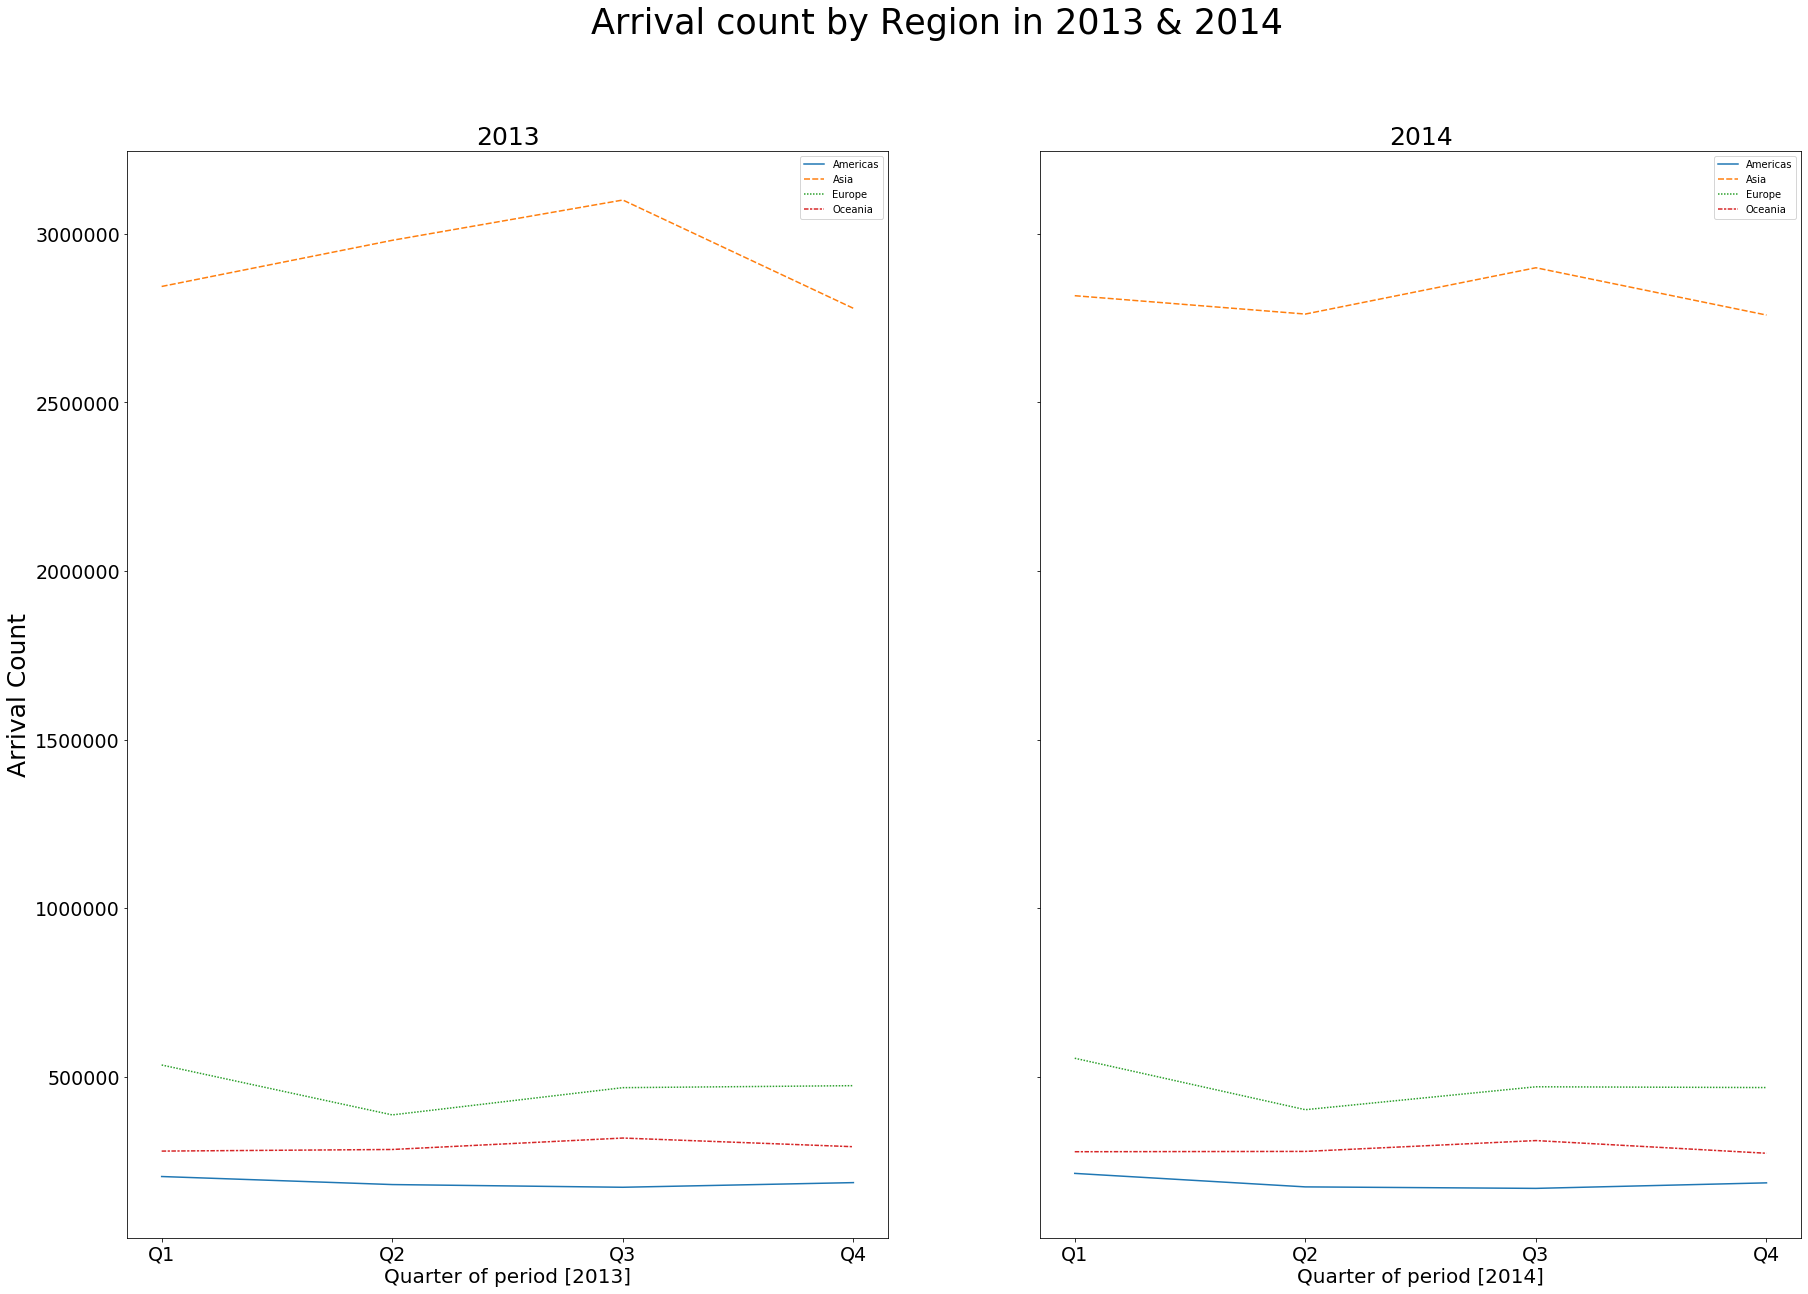

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(30,20),sharey = True)
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Arrival count by Region in 2013 & 2014", fontsize = 35)

ax1 = sns.lineplot(data = df_2013_clean_wide,ax=axes[0])

ax1.set_title("2013",fontsize = 25)
ax1.set_xlabel('Quarter of period [2013]', fontsize=20)
ax1.set_ylabel('Arrival Count', fontsize=25)
ax1.tick_params(labelsize=19)

ax2 = sns.lineplot(data = df_2014_clean_wide,ax=axes[1])

ax2.set_title("2014",fontsize = 25)
ax2.set_xlabel('Quarter of period [2014]', fontsize=20)
ax2.tick_params(labelsize=19)

plt.show()

In [21]:
new_df = pd. DataFrame (arrivals_df ['year'])
new_df['quarter'] = arrivals_df['quarter'] 
new_df ['region'] = arrivals_df ['region']
new_df ['arv_count'] = arrivals_df ['arv_count']


df_2013 = new_df[new_df['year'].isin (['2013'])]
df_2014= new_df[new_df['year'].isin (['2014'])]

asia_df_2013 = df_2013 [df_2013['region'].isin (['Asia'])]
america_df_2013 = df_2013 [df_2013['region'].isin (['Americas'])]
europe_df_2013 = df_2013 [df_2013['region'].isin (['Europe'])]
oceania_df_2013 = df_2013 [df_2013['region'].isin (['Oceania'])]
africa_df_2013 = df_2013 [df_2013['region'].isin (['Africa'])]

asia_df_2014 = df_2014 [df_2014['region'].isin (['Asia'])]
america_df_2014 = df_2014 [df_2014['region'].isin (['Americas'])]
europe_df_2014 = df_2014 [df_2014['region'].isin (['Europe'])]
oceania_df_2014 = df_2014 [df_2014['region'].isin (['Oceania'])]
africa_df_2014 = df_2014 [df_2014['region'].isin (['Africa'])]

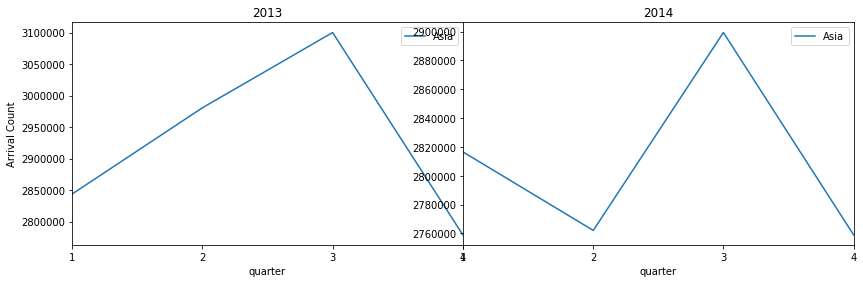

In [22]:
#Asia
fig = plt.figure(figsize = (14,9))

ax3 = fig.add_subplot(2,2,1)
ax4 = fig.add_subplot(2,2,2)

qtrs=[1,2,3,4]
asia_df_2013.plot(x = 'quarter', y = 'arv_count', ax = ax3, xticks=qtrs)
asia_df_2014.plot(x = 'quarter', y = 'arv_count', ax = ax4, xticks=qtrs)
ax3.set_ylabel("Arrival Count")
ax3.set_title('2013')
ax3.legend(['Asia'])
ax4.set_title('2014')
ax4.legend(['Asia'])

plt.subplots_adjust(wspace = 0.001 )


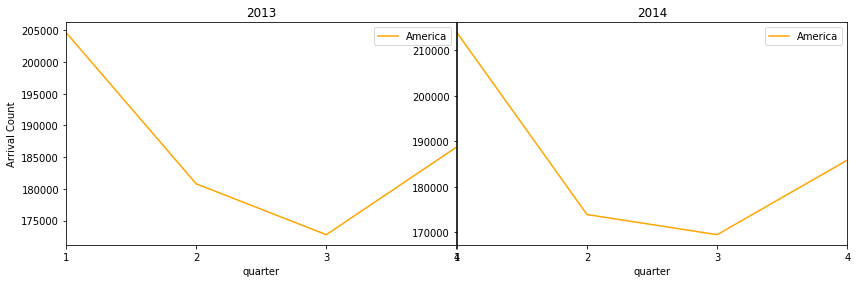

In [23]:
#America
fig = plt.figure(figsize = (14,9))

ax3 = fig.add_subplot(2,2,1)
ax4 = fig.add_subplot(2,2,2)

america_df_2013.plot(x = 'quarter', y = 'arv_count', ax = ax3, color="orange", xticks=qtrs)
america_df_2014.plot(x = 'quarter', y = 'arv_count', ax = ax4,color="orange", xticks=qtrs)
ax3.set_ylabel("Arrival Count")
ax3.set_title('2013')
ax3.legend(['America'])
ax4.set_title('2014')
ax4.legend(['America'])

plt.subplots_adjust(wspace = 0.001 )

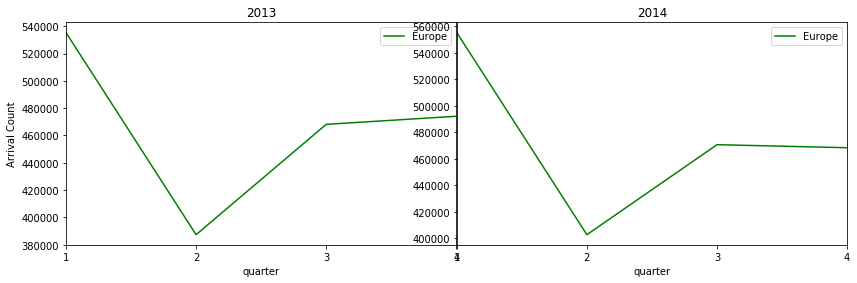

In [24]:
#Europe
fig = plt.figure(figsize = (14,9))

ax3 = fig.add_subplot(2,2,1)
ax4 = fig.add_subplot(2,2,2)

europe_df_2013.plot(x = 'quarter', y = 'arv_count', ax = ax3, color="green", xticks=qtrs)
europe_df_2014.plot(x = 'quarter', y = 'arv_count', ax = ax4,color="green", xticks=qtrs)
ax3.set_ylabel("Arrival Count")
ax3.set_title('2013')
ax3.legend(['Europe'])
ax4.set_title('2014')
ax4.legend(['Europe'])

plt.subplots_adjust(wspace = 0.001 )

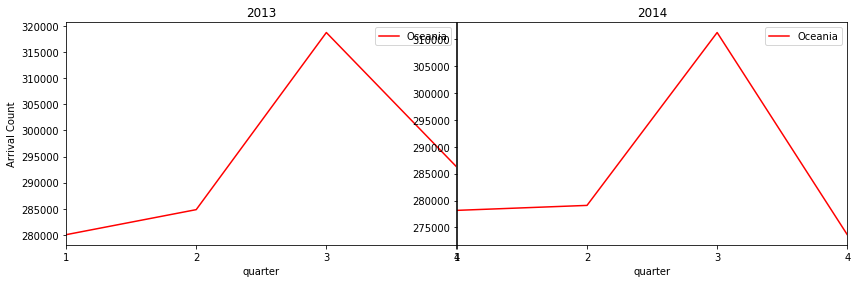

In [25]:
#Oceania
fig = plt.figure(figsize = (14,9))

ax3 = fig.add_subplot(2,2,1)
ax4 = fig.add_subplot(2,2,2)

oceania_df_2013.plot(x = 'quarter', y = 'arv_count', ax = ax3, color="red", xticks=qtrs)
oceania_df_2014.plot(x = 'quarter', y = 'arv_count', ax = ax4,color="red", xticks=qtrs)
ax3.set_ylabel("Arrival Count")
ax3.set_title('2013')
ax3.legend(['Oceania'])
ax4.set_title('2014')
ax4.legend(['Oceania'])

plt.subplots_adjust(wspace = 0.001 )

#### <u>Hotel Tier Data</u>

The Hotel tier data has 3 main variables to describe hotel performance namely Revenue per available room (RevPAR), Average Occupancy Rate (AOR) and Average Room Rate (ARR).<p>
RevPar is a performance measure used in the hospitality industry calculated by multiplying a hotel's average daily room rate by its occupancy rate. It is used to assess a hotel's ability to fill its available rooms at an average rate.  If a property's RevPAR increases, that means the average room rate or occupancy rate is increasing. RevPAR is important because it helps hoteliers measure the overall success of their hotel.<p>
We seek to understand how RevPAR varies over the years per quarter to gain insights on the general hotel performance levels over the year and how it varies across different hotel tiers. We also try to understand how occupancy rates and room rates may affect RevPAR for various hotel tiers.

#### <i>Approach:</i><br>
i. To understand how the 3 hotel variables compare against each other over the years, and also to understand the trend of each variable over the years, we visualised each variable plotting line graphs.<br> 
ii. We also plotted boxplot diagrams for each hotel tier over each quarter over the 2 years for the Average Room Rate. In doing so, we seek to deep dive and understand the spread of room rates for each tier and the period of the year which have the highest and lowest room rates.<br>
iii. We visualised using scatterplot the relationship between occupancy rate and RevPAR.

#### <i>Insights:</i>


<u>RevPAR</u><br>
i. From the line graph visualisation, we can see that Luxury tier hotels have the highest RevPAR and Economy tier hotels have the lowest RevPAR consistently for both years. <br>
ii. Q3 is generally the best performing quarter (using RevPAR) across all hotel tiers over 2013 and 2014. Q2 is more frequently the lower performing quarter- although this is different for Economy hotels with lower performing quarters occurring at tail ends of the year.<br>
<u>Average Room Rate</u><br>
i. From the line graph visualisation, the trend for average room rates seem to be largely consistent and aligned with the RevPAR across different tiers of hotels with Luxury hotels having the highest rates and Economy tier the lowest.<br>
ii. Average room rates are generally higher in Q3, with rates mainly in Sept the highest across all hotel tiers. Luxury and Upscale hotels saw lower rates mainly in June and July of Q2. Mid-tier and Economy hotels had lower rates in Jan/Feb (Q1), Nov/Dec (Q4).<br>
iii. The room rate data is most spread out for Luxury hotels and the least spread out for Economy hotels.<br>
<u>Average Occupancy Rate</u><br>
i. Occupancy rate trends are generally consistent in having higher rates in Q3 for all tiers. The Luxury hotel saw higher average occupancy in Q1 2014 of 90%. Lower occupancy rate takes place in Q2 for Luxury, Upscale and Mid-tier hotels. For Economy hotels lower occupancy rates occur in Q1 & Q4.<br>
ii. Occupancy rates for Economy hotel seem most directly correlated to the RevPAR performance whilst Luxury hotel occupancy rates seem the least directly correlated with RevPAR.


#### <b>A. RevPAR Trend</b>

In [26]:
hotel_tier_revpar_only_df = hotel_tier_df.drop(columns=["aor","arr"])

#hotel_tier_revpar_only_df

economy = 0
luxury = 0
midtier = 0
upscale = 0
quarter1_2013 = []
quarter2_2013 = []
quarter3_2013 = []
quarter4_2013 = []
quarter1_2014 = []
quarter2_2014 = []
quarter3_2014 = []
quarter4_2014 = []
quarter1_2013_aggregated = []
quarter2_2013_aggregated = []
quarter3_2013_aggregated = []
quarter4_2013_aggregated = []
quarter1_2014_aggregated = []
quarter2_2014_aggregated = []
quarter3_2014_aggregated = []
quarter4_2014_aggregated = []
hotel_tier_revpar_only_list_2013 = []
hotel_tier_revpar_only_list_2014 = []

column_names = ["quarter", "tier","revpar"]

for index, row in hotel_tier_revpar_only_df.iterrows():
    if row['period'][0:4] == '2013' and (row['period'][5:7] == '01' or row['period'][5:7] == '02' or row['period'][5:7] == '03'):
        listed_row = row.tolist()
        quarter1_2013.append(listed_row)

for index, row in hotel_tier_revpar_only_df.iterrows():
    if row['period'][0:4] == '2013' and (row['period'][5:7] == '04' or row['period'][5:7] == '05' or row['period'][5:7] == '06'):
        listed_row = row.tolist()
        quarter2_2013.append(listed_row)
        
for index, row in hotel_tier_revpar_only_df.iterrows():
    if row['period'][0:4] == '2013' and (row['period'][5:7] == '07' or row['period'][5:7] == '08' or row['period'][5:7] == '09'):
        listed_row = row.tolist()
        quarter3_2013.append(listed_row)
        
for index, row in hotel_tier_revpar_only_df.iterrows():
    if row['period'][0:4] == '2013' and (row['period'][5:7] == '10' or row['period'][5:7] == '11' or row['period'][5:7] == '12'):
        listed_row = row.tolist()
        quarter4_2013.append(listed_row)

for index, row in hotel_tier_revpar_only_df.iterrows():
    if row['period'][0:4] == '2014' and (row['period'][5:7] == '01' or row['period'][5:7] == '02' or row['period'][5:7] == '03'):
        listed_row = row.tolist()
        quarter1_2014.append(listed_row)

for index, row in hotel_tier_revpar_only_df.iterrows():
    if row['period'][0:4] == '2014' and (row['period'][5:7] == '04' or row['period'][5:7] == '05' or row['period'][5:7] == '06'):
        listed_row = row.tolist()
        quarter2_2014.append(listed_row)
        
for index, row in hotel_tier_revpar_only_df.iterrows():
    if row['period'][0:4] == '2014' and (row['period'][5:7] == '07' or row['period'][5:7] == '08' or row['period'][5:7] == '09'):
        listed_row = row.tolist()
        quarter3_2014.append(listed_row)
        
for index, row in hotel_tier_revpar_only_df.iterrows():
    if row['period'][0:4] == '2014' and (row['period'][5:7] == '10' or row['period'][5:7] == '11' or row['period'][5:7] == '12'):
        listed_row = row.tolist()
        quarter4_2014.append(listed_row)
        
        
for row in quarter1_2013:
    if row[1] == "ECONOMY":
        economy = economy +  row[2]
    elif row[1] == "LUXURY":
        luxury = luxury +  row[2]
    elif row[1] == "MID-TIER":
        midtier = midtier +  row[2]
    elif row[1] == "UPSCALE":
        upscale = upscale +  row[2]

quarter1_2013_aggregated.append(["Q1","ECONOMY",economy/3])
quarter1_2013_aggregated.append(["Q1","LUXURY",luxury/3])
quarter1_2013_aggregated.append(["Q1","MID-TIER",midtier/3])
quarter1_2013_aggregated.append(["Q1","UPSCALE",upscale/3])

economy = 0
luxury = 0
midtier = 0
upscale = 0

for row in quarter2_2013:
    if row[1] == "ECONOMY":
        economy = economy +  row[2]
    elif row[1] == "LUXURY":
        luxury = luxury +  row[2]
    elif row[1] == "MID-TIER":
        midtier = midtier +  row[2]
    elif row[1] == "UPSCALE":
        upscale = upscale +  row[2]

quarter2_2013_aggregated.append(["Q2","ECONOMY",economy/3])
quarter2_2013_aggregated.append(["Q2","LUXURY",luxury/3])
quarter2_2013_aggregated.append(["Q2","MID-TIER",midtier/3])
quarter2_2013_aggregated.append(["Q2","UPSCALE",upscale/3])

economy = 0
luxury = 0
midtier = 0
upscale = 0

for row in quarter3_2013:
    if row[1] == "ECONOMY":
        economy = economy +  row[2]
    elif row[1] == "LUXURY":
        luxury = luxury +  row[2]
    elif row[1] == "MID-TIER":
        midtier = midtier +  row[2]
    elif row[1] == "UPSCALE":
        upscale = upscale +  row[2]

quarter3_2013_aggregated.append(["Q3","ECONOMY",economy/3])
quarter3_2013_aggregated.append(["Q3","LUXURY",luxury/3])
quarter3_2013_aggregated.append(["Q3","MID-TIER",midtier/3])
quarter3_2013_aggregated.append(["Q3","UPSCALE",upscale/3])

economy = 0
luxury = 0
midtier = 0
upscale = 0

for row in quarter4_2013:
    if row[1] == "ECONOMY":
        economy = economy +  row[2]
    elif row[1] == "LUXURY":
        luxury = luxury +  row[2]
    elif row[1] == "MID-TIER":
        midtier = midtier +  row[2]
    elif row[1] == "UPSCALE":
        upscale = upscale +  row[2]

quarter4_2013_aggregated.append(["Q4","ECONOMY",economy/3])
quarter4_2013_aggregated.append(["Q4","LUXURY",luxury/3])
quarter4_2013_aggregated.append(["Q4","MID-TIER",midtier/3])
quarter4_2013_aggregated.append(["Q4","UPSCALE",upscale/3])

economy = 0
luxury = 0
midtier = 0
upscale = 0

for row in quarter1_2014:
    if row[1] == "ECONOMY":
        economy = economy +  row[2]
    elif row[1] == "LUXURY":
        luxury = luxury +  row[2]
    elif row[1] == "MID-TIER":
        midtier = midtier +  row[2]
    elif row[1] == "UPSCALE":
        upscale = upscale +  row[2]

quarter1_2014_aggregated.append(["Q1","ECONOMY",economy/3])
quarter1_2014_aggregated.append(["Q1","LUXURY",luxury/3])
quarter1_2014_aggregated.append(["Q1","MID-TIER",midtier/3])
quarter1_2014_aggregated.append(["Q1","UPSCALE",upscale/3])

economy = 0
luxury = 0
midtier = 0
upscale = 0

for row in quarter2_2014:
    if row[1] == "ECONOMY":
        economy = economy +  row[2]
    elif row[1] == "LUXURY":
        luxury = luxury +  row[2]
    elif row[1] == "MID-TIER":
        midtier = midtier +  row[2]
    elif row[1] == "UPSCALE":
        upscale = upscale +  row[2]

quarter2_2014_aggregated.append(["Q2","ECONOMY",economy/3])
quarter2_2014_aggregated.append(["Q2","LUXURY",luxury/3])
quarter2_2014_aggregated.append(["Q2","MID-TIER",midtier/3])
quarter2_2014_aggregated.append(["Q2","UPSCALE",upscale/3])

economy = 0
luxury = 0
midtier = 0
upscale = 0

for row in quarter3_2014:
    if row[1] == "ECONOMY":
        economy = economy +  row[2]
    elif row[1] == "LUXURY":
        luxury = luxury +  row[2]
    elif row[1] == "MID-TIER":
        midtier = midtier +  row[2]
    elif row[1] == "UPSCALE":
        upscale = upscale +  row[2]

quarter3_2014_aggregated.append(["Q3","ECONOMY",economy/3])
quarter3_2014_aggregated.append(["Q3","LUXURY",luxury/3])
quarter3_2014_aggregated.append(["Q3","MID-TIER",midtier/3])
quarter3_2014_aggregated.append(["Q3","UPSCALE",upscale/3])

economy = 0
luxury = 0
midtier = 0
upscale = 0

for row in quarter4_2014:
    if row[1] == "ECONOMY":
        economy = economy +  row[2]
    elif row[1] == "LUXURY":
        luxury = luxury +  row[2]
    elif row[1] == "MID-TIER":
        midtier = midtier +  row[2]
    elif row[1] == "UPSCALE":
        upscale = upscale +  row[2]

quarter4_2014_aggregated.append(["Q4","ECONOMY",economy/3])
quarter4_2014_aggregated.append(["Q4","LUXURY",luxury/3])
quarter4_2014_aggregated.append(["Q4","MID-TIER",midtier/3])
quarter4_2014_aggregated.append(["Q4","UPSCALE",upscale/3])

economy = 0
luxury = 0
midtier = 0
upscale = 0

#quarter1_2013

hotel_tier_revpar_only_list_2013.extend(quarter1_2013_aggregated)
hotel_tier_revpar_only_list_2013.extend(quarter2_2013_aggregated)
hotel_tier_revpar_only_list_2013.extend(quarter3_2013_aggregated)
hotel_tier_revpar_only_list_2013.extend(quarter4_2013_aggregated)

#hotel_tier_revpar_only_list_2013

hotel_tier_revpar_only_list_2014.extend(quarter1_2014_aggregated)
hotel_tier_revpar_only_list_2014.extend(quarter2_2014_aggregated)
hotel_tier_revpar_only_list_2014.extend(quarter3_2014_aggregated)
hotel_tier_revpar_only_list_2014.extend(quarter4_2014_aggregated)

#hotel_tier_revpar_only_list_2014

hotel_tier_revpar_2013_df =  pd.DataFrame(hotel_tier_revpar_only_list_2013, columns=column_names) 

hotel_tier_revpar_2014_df =  pd.DataFrame(hotel_tier_revpar_only_list_2014, columns=column_names)       

hotel_tier_revpar_2013_wide_df = hotel_tier_revpar_2013_df.pivot("quarter", "tier", "revpar")

hotel_tier_revpar_2014_wide_df = hotel_tier_revpar_2014_df.pivot("quarter", "tier", "revpar")

hotel_tier_revpar_2014_wide_df

tier,ECONOMY,LUXURY,MID-TIER,UPSCALE
quarter,,,,
Q1,84.633333,420.233333,160.366667,234.666667
Q2,89.866667,388.366667,151.966667,224.066667
Q3,91.600000,415.466667,161.800000,241.133333
Q4,85.633333,394.766667,155.566667,230.866667


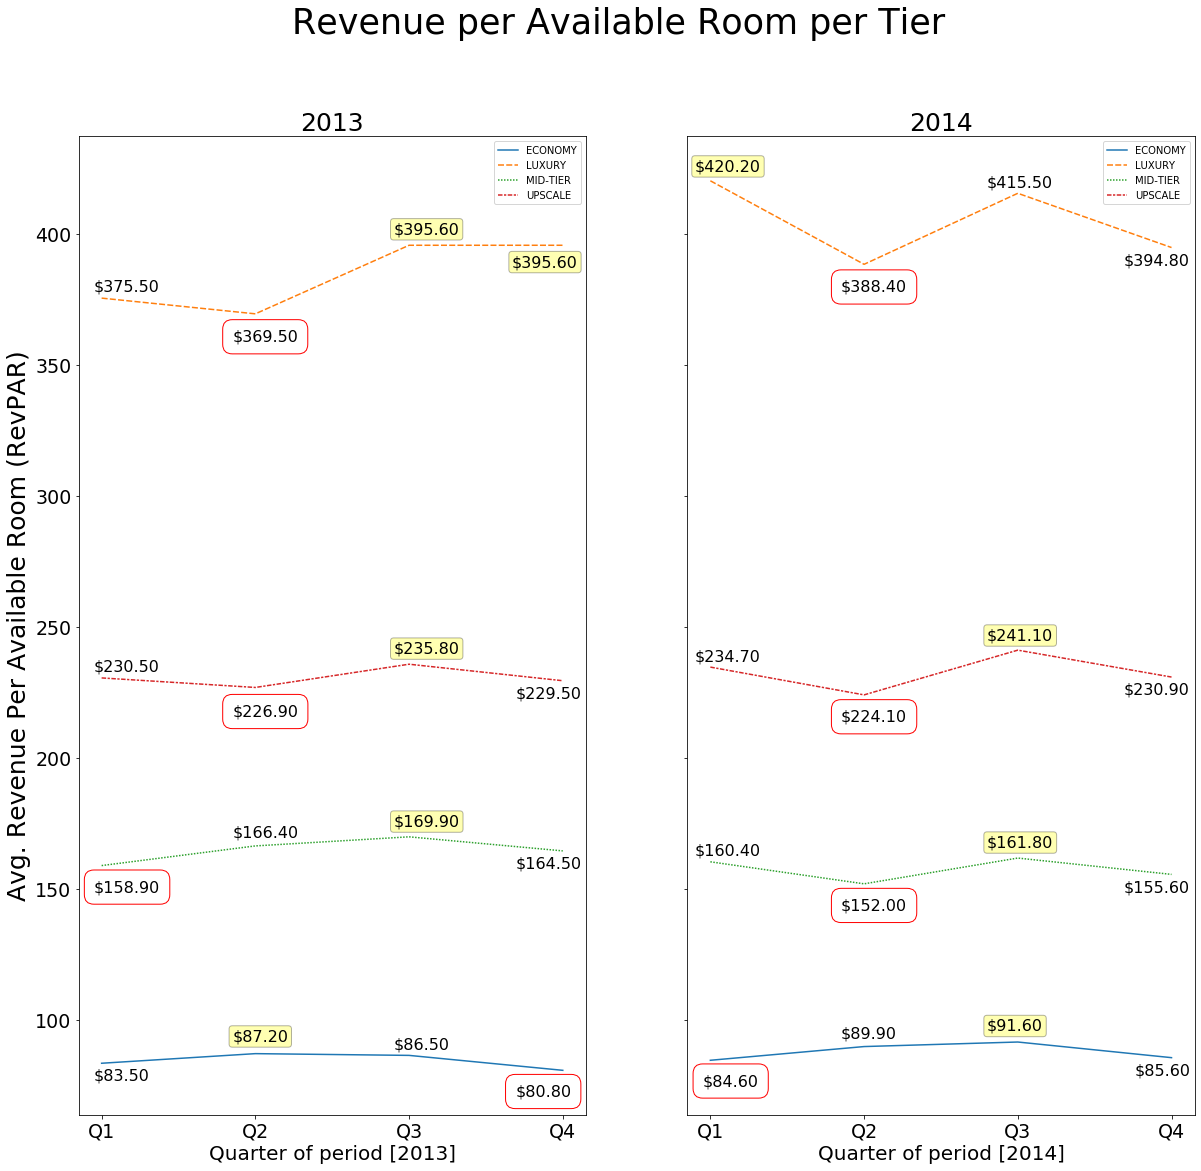

In [27]:
#wide_2013 = hotel_tier_revpar_2013_df.pivot("quarter", "tier", "revpar")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,18),sharey = True)
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Revenue per Available Room per Tier", fontsize = 35)

#fig.tight_layout()

#bplot1 = fig.add_subplot(1,2,1)
#bplot2 = fig.add_subplot(1,2,2)

#ax1.set_yticks(np.arange(0, 500, 50))

ax1 = sns.lineplot(data = hotel_tier_revpar_2013_wide_df,ax=axes[0])

#ax1.set_yticks(np.arange(0, 500, 50))
ax1.set_title("2013",fontsize = 25)
ax1.set_xlabel('Quarter of period [2013]', fontsize=20)
ax1.set_ylabel('Avg. Revenue Per Available Room (RevPAR)', fontsize=25)
ax1.tick_params(labelsize=19)
ax1.annotate('$375.50', xy=(0, 375.5), xytext=(-0.05,378),fontsize=16)
ax1.annotate('$369.50', xy=(1, 369.5), xytext=(0.85,359),fontsize=16,bbox=dict(boxstyle='round,pad=0.6',fc="w",edgecolor='red'))
ax1.annotate('$395.60', xy=(2, 395.6), xytext=(1.9,400),fontsize=16,bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3))
ax1.annotate('$395.60', xy=(3, 395.6), xytext=(2.67,387.5),fontsize=16,bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3))
ax1.annotate('$230.50', xy=(0, 230.5), xytext=(-0.05,233),fontsize=16)
ax1.annotate('$226.90', xy=(1, 226.9), xytext=(0.85,216),fontsize=16,bbox=dict(boxstyle='round,pad=0.6',fc="w",edgecolor='red'))
ax1.annotate('$235.80', xy=(2, 235.8), xytext=(1.9,240),fontsize=16,bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3))
ax1.annotate('$229.50', xy=(0, 229.5), xytext=(2.69,223),fontsize=16)
ax1.annotate('$158.90', xy=(0, 158.9), xytext=(-0.05,149),fontsize=16,bbox=dict(boxstyle='round,pad=0.6',fc="w",edgecolor='red'))
ax1.annotate('$166.40', xy=(0, 166.4), xytext=(0.85,170),fontsize=16)
ax1.annotate('$169.90', xy=(2, 169.9), xytext=(1.9,174),fontsize=16,bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3))
ax1.annotate('$164.50', xy=(3, 166.4), xytext=(2.69,158),fontsize=16)
ax1.annotate('$83.50', xy=(0, 83.5), xytext=(-0.05,77),fontsize=16)
ax1.annotate('$87.20', xy=(1, 87.2), xytext=(0.85,92),fontsize=16,bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3))
ax1.annotate('$86.50', xy=(2, 86.5), xytext=(1.9,89),fontsize=16)
ax1.annotate('$80.80', xy=(3, 80.8), xytext=(2.69,71),fontsize=16,bbox=dict(boxstyle='round,pad=0.6',fc="w",edgecolor='red'))

ax2 = sns.lineplot(data = hotel_tier_revpar_2014_wide_df,ax=axes[1])

#ax1.set_yticks(np.arange(0, 500, 50))
ax2.set_title("2014",fontsize = 25)
ax2.set_xlabel('Quarter of period [2014]', fontsize=20)
ax2.tick_params(labelsize=19)
ax2.annotate('$420.20', xy=(0, 420.2), xytext=(-0.1,424),fontsize=16,bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3))
ax2.annotate('$388.40', xy=(1, 388.4), xytext=(0.85,378),fontsize=16,bbox=dict(boxstyle='round,pad=0.6',fc="w",edgecolor='red'))
ax2.annotate('$415.50', xy=(2, 415.5), xytext=(1.8,418),fontsize=16)
ax2.annotate('$394.80', xy=(3, 394.8), xytext=(2.69,388),fontsize=16)
ax2.annotate('$234.70', xy=(0, 234.7), xytext=(-0.1,237),fontsize=16)
ax2.annotate('$224.10', xy=(1, 224.1), xytext=(0.85,214),fontsize=16,bbox=dict(boxstyle='round,pad=0.6',fc="w",edgecolor='red'))
ax2.annotate('$241.10', xy=(2, 241.1), xytext=(1.8,245),fontsize=16,bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3))
ax2.annotate('$230.90', xy=(3, 230.9), xytext=(2.69,224.5),fontsize=16)
ax2.annotate('$160.40', xy=(0, 160.4), xytext=(-0.1,163),fontsize=16)
ax2.annotate('$152.00', xy=(1, 152), xytext=(0.85,142),fontsize=16,bbox=dict(boxstyle='round,pad=0.6',fc="w",edgecolor='red'))
ax2.annotate('$161.80', xy=(2, 161.8), xytext=(1.8,166),fontsize=16,bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3))
ax2.annotate('$155.60', xy=(3, 155.6), xytext=(2.69,149),fontsize=16)
ax2.annotate('$84.60', xy=(0, 84.6), xytext=(-0.05,75),fontsize=16,bbox=dict(boxstyle='round,pad=0.6',fc="w",edgecolor='red'))
ax2.annotate('$89.90', xy=(1, 89.9), xytext=(0.85,93),fontsize=16)
ax2.annotate('$91.60', xy=(2, 91.6), xytext=(1.8,96),fontsize=16,bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3))
ax2.annotate('$85.60', xy=(3, 85.6), xytext=(2.76,79),fontsize=16)

plt.show()

#### <b>Bii. Average Room Rate Data Spread Analysis</b>

The average room for each tier are generally consistent throughout the year with slight flutuation within each tier. Economy tier rates fluctuate the least, hence if it is performing better in a certain quarter, it will be influenced more largely by occupancy rates.

In [28]:
hotel_tier_list_2013 = []
hotel_tier_list_2014 = []

column_names = ["period", "tier", "aor","arr","revpar"]

for index, row in hotel_tier_df.iterrows():
    if row['period'][0:4] == '2013':
        listed_row = row.tolist()
        hotel_tier_list_2013.append(listed_row)
        
for index, row in hotel_tier_df.iterrows():
    if row['period'][0:4] == '2014':
        listed_row = row.tolist()
        hotel_tier_list_2014.append(listed_row)
        
hotel_tier_2013_df =  pd.DataFrame(hotel_tier_list_2013, columns=column_names)       
        
hotel_tier_2014_df =  pd.DataFrame(hotel_tier_list_2014, columns=column_names)       

#print(hotel_tier_list_2013)

# for index, row in hotel_tier_df.iterrows():
#     print(row)

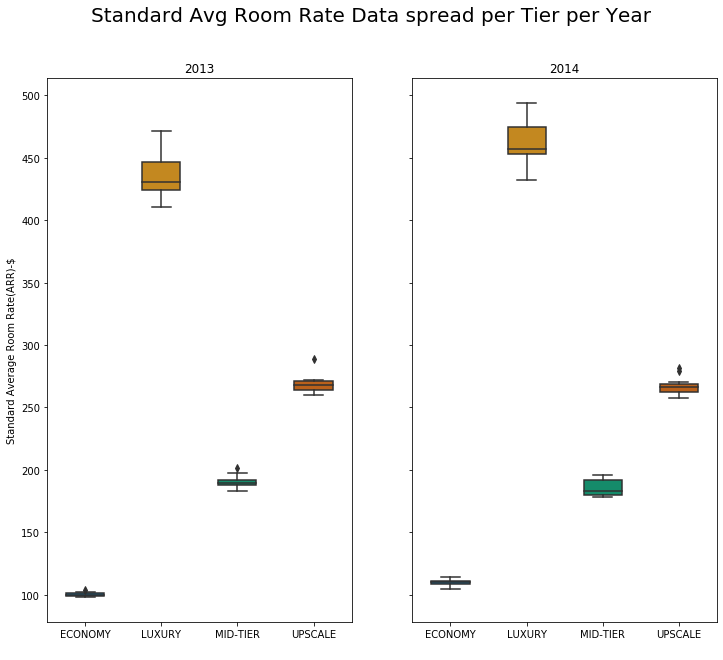

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,10),sharey = True)
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Standard Avg Room Rate Data spread per Tier per Year", fontsize = 20)
#fig.tight_layout()

#bplot1 = fig.add_subplot(1,2,1)
#bplot2 = fig.add_subplot(1,2,2)

#ax1.set_yticks(np.arange(0, 500, 50))

ax1 = sns.boxplot(y='arr', x='tier', 
            data=hotel_tier_2013_df, 
            width=0.5,
            palette="colorblind",
            ax=axes[0])#.set(ylim=(0, 500),title="2013",xlabel=' ',ylabel='Standard Average Room Rate(ARR)-$')

#ax1.set_yticks(np.arange(0, 500, 50))
ax1.set_title("2013")
ax1.set(xlabel=" ", ylabel = "Standard Average Room Rate(ARR)-$")

ax2 = sns.boxplot(y='arr', x='tier', 
            data=hotel_tier_2014_df, 
            width=0.5,
            palette="colorblind",
            ax=axes[1])#.set(ylim=(0, 500),title="2014",xlabel=' ',ylabel=' ')

#ax2.set_yticks(np.arange(0, 550, 50))
ax2.set_title("2014")
ax2.set(xlabel=" ", ylabel = " ")

plt.show()

In [30]:
hotel_tier_list_2013_luxury = []
hotel_tier_list_2014_luxury = []

column_names = ["period", "tier", "aor","arr","revpar"]

for index, row in hotel_tier_df.iterrows():
    if row['period'][0:4] == '2013' and (row['tier'] == "LUXURY" or row['tier'] == "UPSCALE"):
        listed_row = row.tolist()
        hotel_tier_list_2013_luxury.append(listed_row)
        
for index, row in hotel_tier_df.iterrows():
    if row['period'][0:4] == '2014' and (row['tier'] == "LUXURY" or row['tier'] == "UPSCALE"):
        listed_row = row.tolist()
        hotel_tier_list_2014_luxury.append(listed_row)
        
hotel_tier_2013_luxury_df =  pd.DataFrame(hotel_tier_list_2013_luxury, columns=column_names)       
        
hotel_tier_2014_luxury_df =  pd.DataFrame(hotel_tier_list_2014_luxury, columns=column_names)       


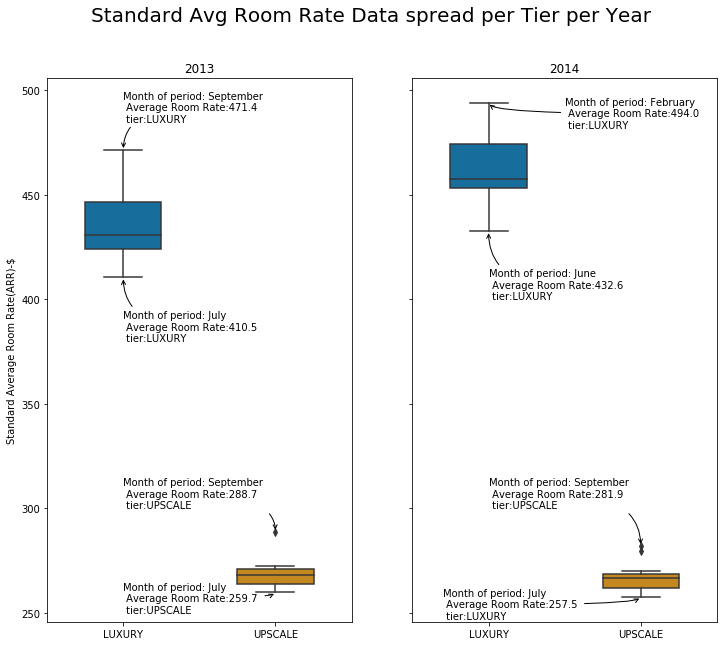

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,10),sharey = True)
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Standard Avg Room Rate Data spread per Tier per Year", fontsize = 20)
#fig.tight_layout()

#bplot1 = fig.add_subplot(1,2,1)
#bplot2 = fig.add_subplot(1,2,2)

#ax1.set_yticks(np.arange(0, 500, 50))

ax1 = sns.boxplot(y='arr', x='tier', 
            data=hotel_tier_2013_luxury_df, 
            width=0.5,
            palette="colorblind",
            ax=axes[0])#.set(ylim=(0, 500),title="2013",xlabel=' ',ylabel='Standard Average Room Rate(ARR)-$')

#ax1.set_yticks(np.arange(0, 600, 50))
ax1.set_title("2013")
ax1.set(xlabel=" ", ylabel = "Standard Average Room Rate(ARR)-$")
ax1.annotate('Month of period: September \n Average Room Rate:471.4 \n tier:LUXURY', xy=(0, 471.4), xytext=(0,485),
            arrowprops=dict(arrowstyle="->",connectionstyle="angle3,angleA=0,angleB=-90"))
ax1.annotate('Month of period: July \n Average Room Rate:410.5 \n tier:LUXURY', xy=(0, 410.5), xytext=(0,380),
            arrowprops=dict(arrowstyle="->",connectionstyle="angle3,angleA=0,angleB=-90"))
ax1.annotate('Month of period: September \n Average Room Rate:288.7 \n tier:UPSCALE', xy=(1, 288.7), xytext=(0,300),
            arrowprops=dict(arrowstyle="->",connectionstyle="angle3,angleA=0,angleB=-90"))
ax1.annotate('Month of period: July \n Average Room Rate:259.7 \n tier:UPSCALE', xy=(1, 259.7), xytext=(0,250),
            arrowprops=dict(arrowstyle="->",connectionstyle="angle3,angleA=0,angleB=-90"))

ax2 = sns.boxplot(y='arr', x='tier', 
            data=hotel_tier_2014_luxury_df, 
            width=0.5,
            palette="colorblind",
            ax=axes[1])#.set(ylim=(0, 500),title="2014",xlabel=' ',ylabel=' ')

#ax2.set_yticks(np.arange(0, 550, 50))
ax2.set_title("2014")
ax2.set(xlabel=" ", ylabel = " ")
ax2.annotate('Month of period: February \n Average Room Rate:494.0 \n tier:LUXURY', xy=(0, 494.0), xytext=(0.5,482),
            arrowprops=dict(arrowstyle="->",connectionstyle="angle3,angleA=0,angleB=-90"))
ax2.annotate('Month of period: June \n Average Room Rate:432.6 \n tier:LUXURY', xy=(0, 432.6), xytext=(0,400),
            arrowprops=dict(arrowstyle="->",connectionstyle="angle3,angleA=0,angleB=-90"))
ax2.annotate('Month of period: September \n Average Room Rate:281.9 \n tier:UPSCALE', xy=(1, 281.9), xytext=(0,300),
            arrowprops=dict(arrowstyle="->",connectionstyle="angle3,angleA=0,angleB=-90"))
ax2.annotate('Month of period: July \n Average Room Rate:257.5 \n tier:LUXURY', xy=(1, 257.5), xytext=(-0.3,247),
            arrowprops=dict(arrowstyle="->",connectionstyle="angle3,angleA=0,angleB=-90"))


plt.show()

In [32]:
hotel_tier_list_2013_economy = []
hotel_tier_list_2014_economy = []

column_names = ["period", "tier", "aor","arr","revpar"]

for index, row in hotel_tier_df.iterrows():
    if row['period'][0:4] == '2013' and (row['tier'] == "MID-TIER" or row['tier'] == "ECONOMY"):
        listed_row = row.tolist()
        hotel_tier_list_2013_economy.append(listed_row)
        
for index, row in hotel_tier_df.iterrows():
    if row['period'][0:4] == '2014' and (row['tier'] == "MID-TIER" or row['tier'] == "ECONOMY"):
        listed_row = row.tolist()
        hotel_tier_list_2014_economy.append(listed_row)
        
hotel_tier_2013_economy_df =  pd.DataFrame(hotel_tier_list_2013_economy, columns=column_names)       
        
hotel_tier_2014_economy_df =  pd.DataFrame(hotel_tier_list_2014_economy, columns=column_names)       

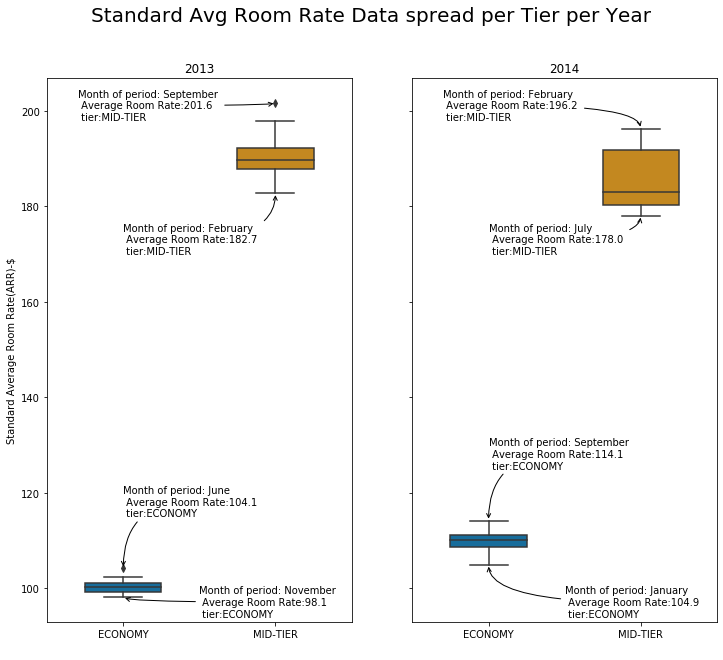

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,10),sharey = True)
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Standard Avg Room Rate Data spread per Tier per Year",fontsize = 20)
#fig.tight_layout()

#bplot1 = fig.add_subplot(1,2,1)
#bplot2 = fig.add_subplot(1,2,2)

#ax1.set_yticks(np.arange(0, 500, 50))

ax1 = sns.boxplot(y='arr', x='tier', 
            data=hotel_tier_2013_economy_df, 
            width=0.5,
            palette="colorblind",
            ax=axes[0])#.set(ylim=(0, 500),title="2013",xlabel=' ',ylabel='Standard Average Room Rate(ARR)-$')

#ax1.set_yticks(np.arange(0, 600, 50))
ax1.set_title("2013")
ax1.set(xlabel=" ", ylabel = "Standard Average Room Rate(ARR)-$")
ax1.annotate('Month of period: September \n Average Room Rate:201.6 \n tier:MID-TIER', xy=(1, 201.6), xytext=(-0.3,198),
            arrowprops=dict(arrowstyle="->",connectionstyle="angle3,angleA=0,angleB=-90"))
ax1.annotate('Month of period: February \n Average Room Rate:182.7 \n tier:MID-TIER', xy=(1, 182.7), xytext=(0,170),
            arrowprops=dict(arrowstyle="->",connectionstyle="angle3,angleA=0,angleB=-90"))
ax1.annotate('Month of period: June \n Average Room Rate:104.1 \n tier:ECONOMY', xy=(0, 104.1), xytext=(0,115),
            arrowprops=dict(arrowstyle="->",connectionstyle="angle3,angleA=0,angleB=-90"))
ax1.annotate('Month of period: November \n Average Room Rate:98.1 \n tier:ECONOMY', xy=(0, 98.1), xytext=(0.5,94),
            arrowprops=dict(arrowstyle="->",connectionstyle="angle3,angleA=0,angleB=-90"))

ax2 = sns.boxplot(y='arr', x='tier', 
            data=hotel_tier_2014_economy_df, 
            width=0.5,
            palette="colorblind",
            ax=axes[1])#.set(ylim=(0, 500),title="2014",xlabel=' ',ylabel=' ')

#ax2.set_yticks(np.arange(0, 550, 50))
ax2.set_title("2014")
ax2.set(xlabel=" ", ylabel = " ")
ax2.annotate('Month of period: February \n Average Room Rate:196.2 \n tier:MID-TIER', xy=(1, 196.2), xytext=(-0.3,198),
            arrowprops=dict(arrowstyle="->",connectionstyle="angle3,angleA=0,angleB=-90"))
ax2.annotate('Month of period: July \n Average Room Rate:178.0 \n tier:MID-TIER', xy=(1, 178.0), xytext=(0,170),
            arrowprops=dict(arrowstyle="->",connectionstyle="angle3,angleA=0,angleB=-90"))
ax2.annotate('Month of period: September \n Average Room Rate:114.1 \n tier:ECONOMY', xy=(0, 114.1), xytext=(0,125),
            arrowprops=dict(arrowstyle="->",connectionstyle="angle3,angleA=0,angleB=-90"))
ax2.annotate('Month of period: January \n Average Room Rate:104.9 \n tier:ECONOMY', xy=(0, 104.9), xytext=(0.5,94),
            arrowprops=dict(arrowstyle="->",connectionstyle="angle3,angleA=0,angleB=-90"))


plt.show()

#### <b>Bii. Average Room Rate Trend</b>

In [34]:
def get_year(x):
    if '2013' in x:
        year = 2013
    elif '2014' in x:
        year = 2014
    else:
        year = 2015
    return year

def get_quarter(x):
    if '-01' in x or '-02' in x or '-03' in x:
        quarter = 'Q1'
    elif '-04' in x or '-05' in x or '-06' in x:
        quarter = 'Q2'
    elif '-07' in x or '-08' in x or '-09' in x:
        quarter = 'Q3'
    else:
        quarter='Q4'
    return quarter

In [35]:
hotel_tier_df['year'] = hotel_tier_df['period'].apply(get_year)
hotel_tier_df['quarter'] = hotel_tier_df['period'].apply (get_quarter)

In [36]:
new_df = hotel_tier_df[hotel_tier_df['year'].isin (['2013','2014'])]
hotel_df_group = new_df.groupby(['year','tier','quarter'], as_index =False)
arr_per_quarter = round(hotel_df_group['arr'].mean(),2)
arr_per_quarter_df= pd.DataFrame(arr_per_quarter)
df_2013 = arr_per_quarter_df[arr_per_quarter_df['year'].isin (['2013'])]
df_2014= arr_per_quarter_df[arr_per_quarter_df['year'].isin (['2014'])]

economy_2013= df_2013 [df_2013['tier'].isin(['ECONOMY'])]
luxury_2013= df_2013 [df_2013['tier'].isin(['LUXURY'])]
midtier_2013= df_2013 [df_2013['tier'].isin(['MID-TIER'])]
upscale_2013 = df_2013 [df_2013['tier'].isin(['UPSCALE'])]

economy_2014= df_2014 [df_2014['tier'].isin(['ECONOMY'])]
luxury_2014= df_2014 [df_2014['tier'].isin(['LUXURY'])]
midtier_2014= df_2014 [df_2014['tier'].isin(['MID-TIER'])]
upscale_2014 = df_2014 [df_2014['tier'].isin(['UPSCALE'])]

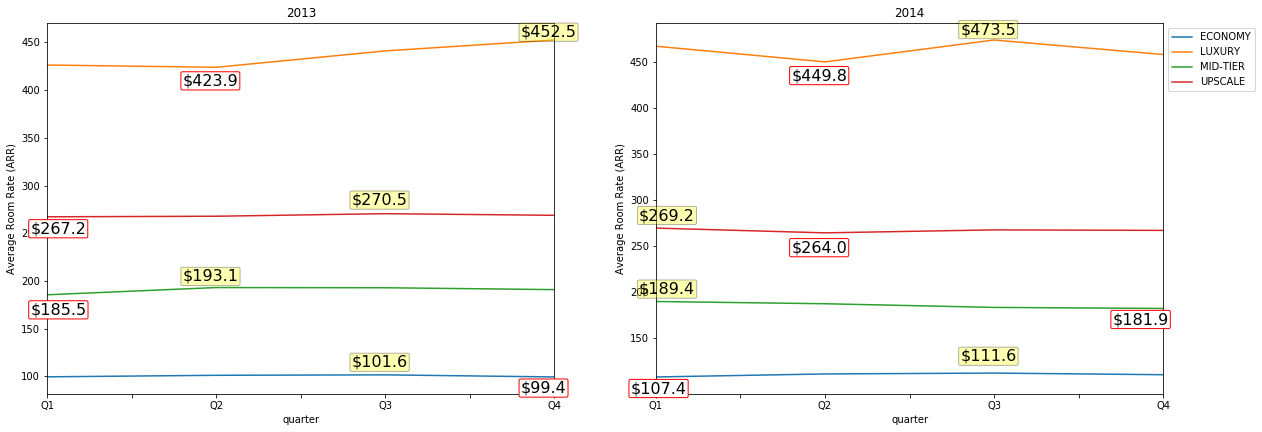

<Figure size 288x288 with 0 Axes>

In [37]:
fig = plt.figure(figsize = (20,15))

ax0 = fig.add_subplot(2,2,1)
ax1 = fig.add_subplot(2,2,2)

economy_2013.plot(x = 'quarter', y = 'arr', ax = ax0)
luxury_2013.plot(x = 'quarter', y = 'arr', ax = ax0)
midtier_2013.plot(x = 'quarter', y = 'arr', ax = ax0)
upscale_2013.plot(x = 'quarter', y = 'arr', ax = ax0)

economy_2014.plot(x = 'quarter', y = 'arr', ax = ax1)
luxury_2014.plot(x = 'quarter', y = 'arr', ax = ax1)
midtier_2014.plot(x = 'quarter', y = 'arr', ax = ax1)
upscale_2014.plot(x = 'quarter', y = 'arr', ax = ax1)

ax0.set_ylabel("Average Room Rate (ARR)")
ax0.set_title('2013')
ax0.get_legend().remove()
ax0.annotate('$423.9', xy=(1, 423.9), xytext=(0.8,405),fontsize=16, bbox=dict(boxstyle='round,pad=0.1',fc="w",edgecolor='red'))
ax0.annotate('$452.5', xy=(3, 452.5), xytext=(2.8,456),fontsize=16, bbox=dict(boxstyle='round,pad=0.1', fc='yellow', alpha=0.3))
ax0.annotate('$270.5', xy=(2, 270.5), xytext=(1.8,280),fontsize=16, bbox=dict(boxstyle='round,pad=0.1', fc='yellow', alpha=0.3))
ax0.annotate('$267.2', xy=(0, 267.2), xytext=(-0.1,250),fontsize=16, bbox=dict(boxstyle='round,pad=0.1',fc="w",edgecolor='red'))
ax0.annotate('$193.1', xy=(1, 193.1), xytext=(0.8,200),fontsize=16, bbox=dict(boxstyle='round,pad=0.1', fc='yellow', alpha=0.3))
ax0.annotate('$185.5', xy=(0, 185.5), xytext=(-0.1,165),fontsize=16, bbox=dict(boxstyle='round,pad=0.1',fc="w",edgecolor='red'))
ax0.annotate('$99.4', xy=(3, 99.4), xytext=(2.8,83),fontsize=16, bbox=dict(boxstyle='round,pad=0.1',fc="w",edgecolor='red'))
ax0.annotate('$101.6', xy=(2, 101.6), xytext=(1.8,110),fontsize=16, bbox=dict(boxstyle='round,pad=0.1', fc='yellow', alpha=0.3))

ax1.set_ylabel("Average Room Rate (ARR)")
ax1.set_title('2014')
ax1.legend(['ECONOMY', 'LUXURY', 'MID-TIER', 'UPSCALE'], bbox_to_anchor=(1, 1))
ax1.annotate('$449.8', xy=(1, 449.8), xytext=(0.8,430),fontsize=16, bbox=dict(boxstyle='round,pad=0.1',fc="w",edgecolor='red'))
ax1.annotate('$473.5', xy=(2, 473.5), xytext=(1.8,480),fontsize=16, bbox=dict(boxstyle='round,pad=0.1', fc='yellow', alpha=0.3))
ax1.annotate('$269.2', xy=(0, 269.2), xytext=(-0.1,278),fontsize=16, bbox=dict(boxstyle='round,pad=0.1', fc='yellow', alpha=0.3))
ax1.annotate('$264.0', xy=(1, 264.0), xytext=(0.8,243),fontsize=16, bbox=dict(boxstyle='round,pad=0.1',fc="w",edgecolor='red'))
ax1.annotate('$189.4', xy=(2, 189.4), xytext=(-0.1,198),fontsize=16, bbox=dict(boxstyle='round,pad=0.1', fc='yellow', alpha=0.3))
ax1.annotate('$181.9', xy=(2, 181.9), xytext=(2.7,165),fontsize=16, bbox=dict(boxstyle='round,pad=0.1',fc="w",edgecolor='red'))
ax1.annotate('$107.4', xy=(3, 107.4), xytext=(-0.15,90),fontsize=16, bbox=dict(boxstyle='round,pad=0.1',fc="w",edgecolor='red'))
ax1.annotate('$111.6', xy=(3, 111.6), xytext=(1.8,125),fontsize=16, bbox=dict(boxstyle='round,pad=0.1', fc='yellow', alpha=0.3))

plt.figure(figsize = (4,4))
gs1 = gridspec.GridSpec(4, 4)
gs1.update(wspace=0.5, hspace=0.05) # set the spacing between axes. 
plt.show()

#### <b>Ci. Average Occupancy Rate Trend Per Tier</b>

In [38]:
hotel_tier_2013_df['quarter'] = hotel_tier_2013_df['period'].apply(get_quarter)
hotel_tier_2014_df['quarter'] = hotel_tier_2014_df['period'].apply(get_quarter)

hotel_2013_gb_df = hotel_tier_2013_df.groupby(['tier','quarter'], as_index =False)
hotel_2014_gb_df = hotel_tier_2014_df.groupby(['tier','quarter'], as_index =False)
aor_2013_quarter = round(hotel_2013_gb_df['aor'].mean(),2)
aor_2013_quarter_df= pd.DataFrame(aor_2013_quarter)
aor_2014_quarter = round(hotel_2014_gb_df['aor'].mean(),2)
aor_2014_quarter_df= pd.DataFrame(aor_2014_quarter)

economy_2013_aor = aor_2013_quarter_df[aor_2013_quarter_df['tier'].isin(['ECONOMY'])]
luxury_2013_aor = aor_2013_quarter_df[aor_2013_quarter_df['tier'].isin(['LUXURY'])]
midtier_2013_aor = aor_2013_quarter_df[aor_2013_quarter_df['tier'].isin(['MID-TIER'])]
upscale_2013_aor = aor_2013_quarter_df[aor_2013_quarter_df['tier'].isin(['UPSCALE'])]

economy_2014_aor = aor_2014_quarter_df[aor_2014_quarter_df['tier'].isin(['ECONOMY'])]
luxury_2014_aor = aor_2014_quarter_df[aor_2014_quarter_df['tier'].isin(['LUXURY'])]
midtier_2014_aor = aor_2014_quarter_df[aor_2014_quarter_df['tier'].isin(['MID-TIER'])]
upscale_2014_aor = aor_2014_quarter_df[aor_2014_quarter_df['tier'].isin(['UPSCALE'])]

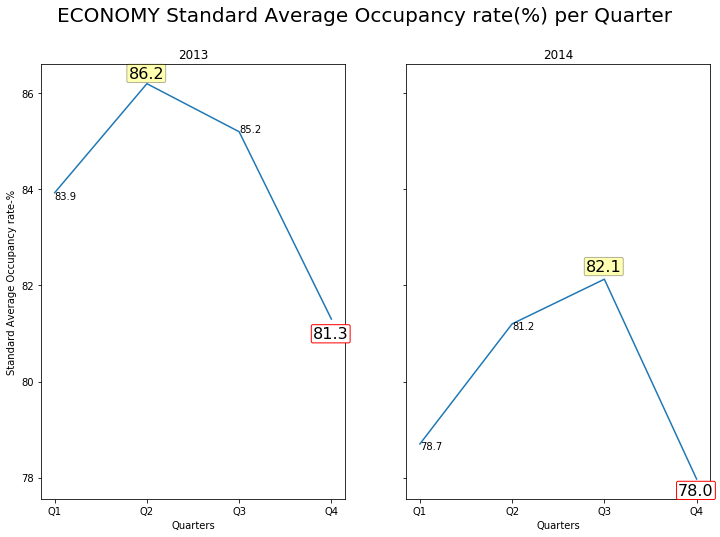

In [39]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,8), sharey = True)
plt.subplots_adjust(hspace=0.5)
plt.suptitle("ECONOMY Standard Average Occupancy rate(%) per Quarter", fontsize = 20)


ax1 = sns.lineplot(y='aor', x='quarter', 
            data=economy_2013_aor,
            ax=axes[0],
            ci = None)
ax1.set_title("2013")
ax1.set(xlabel="Quarters", ylabel = "Standard Average Occupancy rate-%")
ax1.text('Q1', 83.8 , '83.9')
ax1.text('Q3', 85.2 , '85.2')
ax1.annotate('81.3', xy=(3, 81.3), xytext=(2.8,80.9),fontsize=16, bbox=dict(boxstyle='round,pad=0.1',fc="w",edgecolor='red'))
ax1.annotate('86.2', xy=(1, 86.2), xytext=(0.8,86.32),fontsize=16, bbox=dict(boxstyle='round,pad=0.1', fc='yellow', alpha=0.3))

ax2 = sns.lineplot(y='aor', x='quarter', 
            data=economy_2014_aor,
            ax=axes[1],
            ci = None)
ax2.set_title("2014")
ax2.set(xlabel="Quarters", ylabel = "Standard Average Occupancy rate-%")
ax2.text('Q1', 78.6 , '78.7')
ax2.text('Q2', 81.1 , '81.2')
ax2.annotate('78.0', xy=(3, 78.0), xytext=(2.8,77.64),fontsize=16, bbox=dict(boxstyle='round,pad=0.1',fc="w",edgecolor='red'))
ax2.annotate('82.1', xy=(2, 82.1), xytext=(1.8,82.3),fontsize=16, bbox=dict(boxstyle='round,pad=0.1', fc='yellow', alpha=0.3))

plt.show()

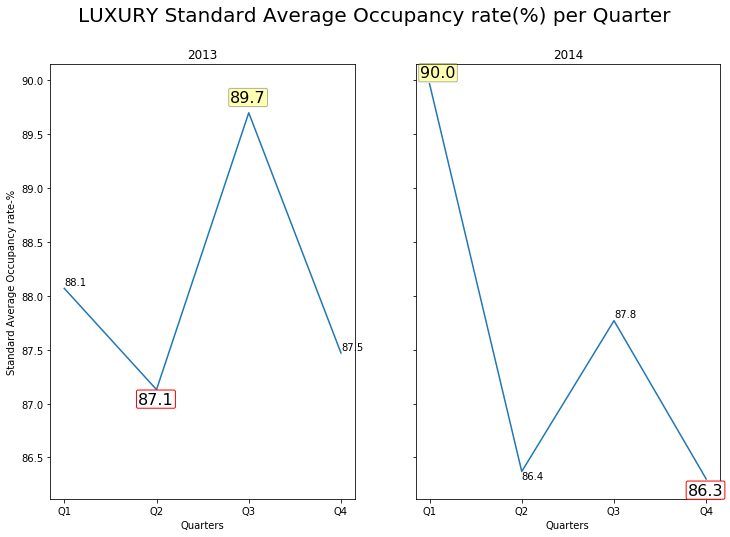

In [40]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,8), sharey = True)
plt.subplots_adjust(hspace=0.5)
plt.suptitle("LUXURY Standard Average Occupancy rate(%) per Quarter", fontsize = 20)


ax1 = sns.lineplot(y='aor', x='quarter', 
            data=luxury_2013_aor,
            ax=axes[0],
            ci = None)
ax1.set_title("2013")
ax1.set(xlabel="Quarters", ylabel = "Standard Average Occupancy rate-%")
ax1.text('Q1', 88.1 , '88.1')
ax1.text('Q4', 87.5 , '87.5')
ax1.annotate('87.1', xy=(1, 87.1), xytext=(0.8,87.0),fontsize=16, bbox=dict(boxstyle='round,pad=0.1',fc="w",edgecolor='red'))
ax1.annotate('89.7', xy=(2, 89.7), xytext=(1.8,89.8),fontsize=16, bbox=dict(boxstyle='round,pad=0.1', fc='yellow', alpha=0.3))


ax2 = sns.lineplot(y='aor', x='quarter', 
            data=luxury_2014_aor,
            ax=axes[1],
            ci = None)
ax2.set_title("2014")
ax2.set(xlabel="Quarters", ylabel = "Standard Average Occupancy rate-%")
ax2.text('Q2', 86.3 , '86.4')
ax2.text('Q3', 87.8 , '87.8')
ax2.annotate('86.3', xy=(3, 86.3), xytext=(2.8,86.155),fontsize=16, bbox=dict(boxstyle='round,pad=0.1',fc="w",edgecolor='red'))
ax2.annotate('90.0', xy=(0, 90.0), xytext=(-0.1,90.03),fontsize=16, bbox=dict(boxstyle='round,pad=0.1', fc='yellow', alpha=0.3))

plt.show()

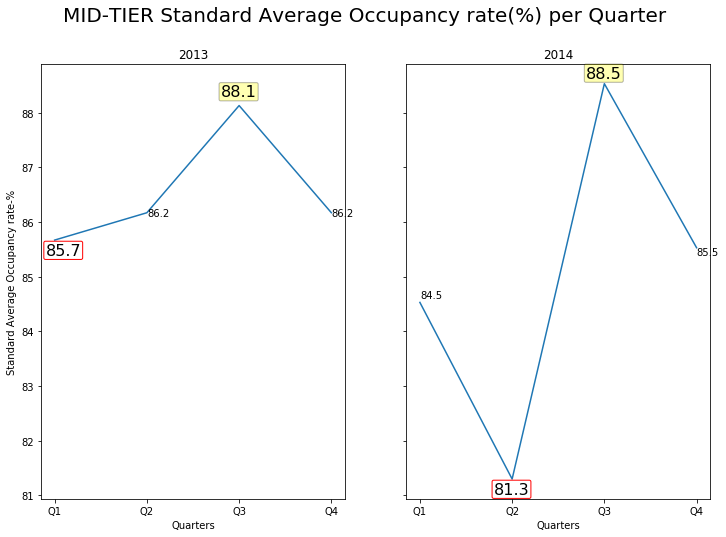

In [41]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,8), sharey = True)
plt.subplots_adjust(hspace=0.5)
plt.suptitle("MID-TIER Standard Average Occupancy rate(%) per Quarter", fontsize = 20)


ax1 = sns.lineplot(y='aor', x='quarter', 
            data=midtier_2013_aor,
            ax=axes[0],
            ci = None)
ax1.set_title("2013")
ax1.set(xlabel="Quarters", ylabel = "Standard Average Occupancy rate-%")
ax1.text('Q2', 86.1 , '86.2')
ax1.text('Q4', 86.1 , '86.2')
ax1.annotate('85.7', xy=(0, 85.7), xytext=(-0.1,85.4),fontsize=16, bbox=dict(boxstyle='round,pad=0.1',fc="w",edgecolor='red'))
ax1.annotate('88.1', xy=(2, 88.1), xytext=(1.8,88.3),fontsize=16, bbox=dict(boxstyle='round,pad=0.1', fc='yellow', alpha=0.3))

ax2 = sns.lineplot(y='aor', x='quarter', 
            data=midtier_2014_aor,
            ax=axes[1],
            ci = None)
ax2.set_title("2014")
ax2.set(xlabel="Quarters", ylabel = "Standard Average Occupancy rate-%")
ax2.text('Q1', 84.6 , '84.5')
ax2.text('Q4', 85.4 , '85.5')
ax2.annotate('81.3', xy=(1, 81.3), xytext=(0.8,81.03),fontsize=16, bbox=dict(boxstyle='round,pad=0.1',fc="w",edgecolor='red'))
ax2.annotate('88.5', xy=(2, 88.5), xytext=(1.8,88.64),fontsize=16, bbox=dict(boxstyle='round,pad=0.1', fc='yellow', alpha=0.3))
plt.show()

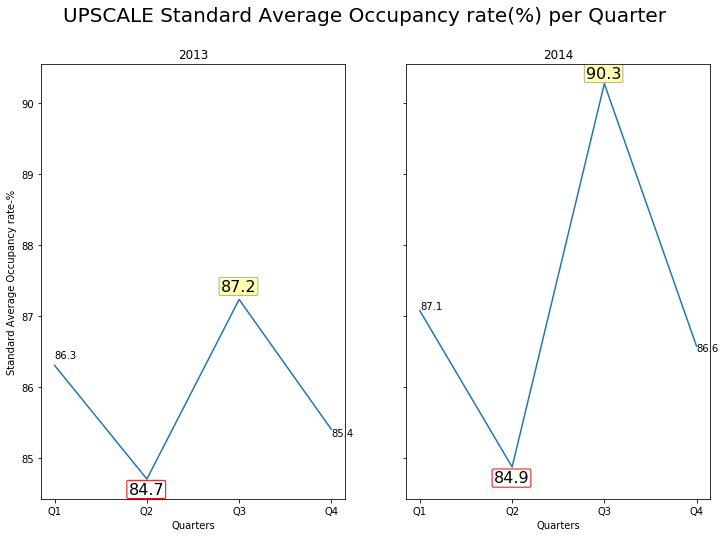

In [42]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,8), sharey = True)
plt.subplots_adjust(hspace=0.5)
plt.suptitle("UPSCALE Standard Average Occupancy rate(%) per Quarter", fontsize = 20)


ax1 = sns.lineplot(y='aor', x='quarter', 
            data=upscale_2013_aor,
            ax=axes[0],
            ci = None)
ax1.set_title("2013")
ax1.set(xlabel="Quarters", ylabel = "Standard Average Occupancy rate-%")
ax1.text('Q1', 86.4 , '86.3')
ax1.text('Q4', 85.3 , '85.4')
ax1.annotate('84.7', xy=(1, 84.7), xytext=(0.8,84.49),fontsize=16, bbox=dict(boxstyle='round,pad=0.1',fc="w",edgecolor='red'))
ax1.annotate('87.2', xy=(2, 87.2), xytext=(1.8,87.35),fontsize=16, bbox=dict(boxstyle='round,pad=0.1', fc='yellow', alpha=0.3))

ax2 = sns.lineplot(y='aor', x='quarter', 
            data=upscale_2014_aor,
            ax=axes[1],
            ci = None)
ax2.set_title("2014")
ax2.set(xlabel="Quarters", ylabel = "Standard Average Occupancy rate-%")
ax2.text('Q1', 87.1 , '87.1')
ax2.text('Q4', 86.5 , '86.6')
ax2.annotate('84.9', xy=(1, 84.9), xytext=(0.8,84.65),fontsize=16, bbox=dict(boxstyle='round,pad=0.1',fc="w",edgecolor='red'))
ax2.annotate('90.3', xy=(2, 90.3), xytext=(1.8,90.35),fontsize=16, bbox=dict(boxstyle='round,pad=0.1', fc='yellow', alpha=0.3))

plt.show()

#### <b>Cii. Average Occupancy Rate correlation with RevPAR</b>

In [43]:
hotels_df_bool =hotel_tier_df['period'].isin(['2013-01','2013-02','2013-03','2013-04','2013-05','2013-06','2013-07','2013-08','2013-09','2013-10','2013-11','2013-12'])
period2013_df = hotel_tier_df[hotels_df_bool]

In [44]:
period2013_economy_df_bool =period2013_df['tier'].isin(['ECONOMY'])
period2013_economy_df = period2013_df[period2013_economy_df_bool]

In [45]:
period2013_lux_df_bool =period2013_df['tier'].isin(['LUXURY'])
period2013_lux_df = period2013_df[period2013_lux_df_bool]

In [46]:
period2013_mid_df_bool =period2013_df['tier'].isin(['MID-TIER'])
period2013_mid_df = period2013_df[period2013_mid_df_bool]

In [47]:
period2013_up_df_bool =period2013_df['tier'].isin(['UPSCALE'])
period2013_up_df = period2013_df[period2013_up_df_bool]

In [48]:
hotels_df_bool =hotel_tier_df['period'].isin(['2014-01','2014-02','2014-03','2014-04','2014-05','2014-06','2014-07','2014-08','2014-09','2014-10','2014-11','2014-12'])
period2014_df = hotel_tier_df[hotels_df_bool]

In [49]:
period2014_economy_df_bool =period2014_df['tier'].isin(['ECONOMY'])
period2014_economy_df = period2014_df[period2014_economy_df_bool]

In [50]:
period2014_lux_df_bool =period2014_df['tier'].isin(['LUXURY'])
period2014_lux_df = period2014_df[period2014_lux_df_bool]

In [51]:
period2014_mid_df_bool =period2014_df['tier'].isin(['MID-TIER'])
period2014_mid_df = period2014_df[period2014_mid_df_bool]

In [52]:
period2014_up_df_bool =period2014_df['tier'].isin(['UPSCALE'])
period2014_up_df = period2014_df[period2014_up_df_bool]

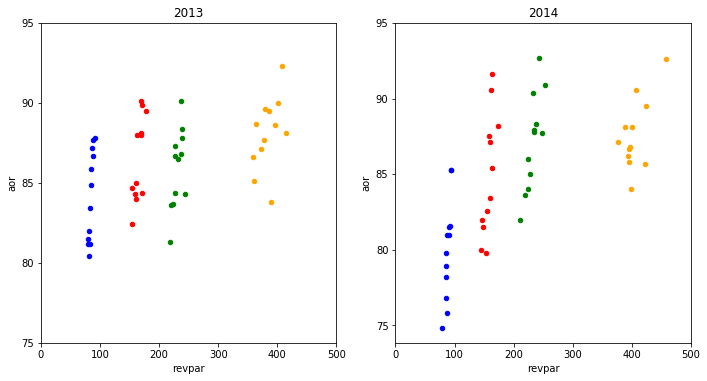

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# -------------- #
### SECTION 2 ###
## VISUALISE ## 

fig = plt.figure(figsize=(18, 20))
ax1 = fig.add_subplot(3,3,1)
ax2 = fig.add_subplot(3,3,2)
#ax3 = fig.add_subplot(3,3,3)
#ax3 = fig.add_subplot(2,1,2)

#Plot for 2013
#ax1.set_xlabel("Standard Average Occupancy Rate")
ax1.set_title("2013")

ax1 = period2013_economy_df.plot(kind='scatter',x='revpar', y='aor', ax=ax1
           ,color="blue")

ax1.set_yticks(np.arange(0, 141, 20)) #This needs to be specified so both charts are on the same scale.


period2013_lux_df.plot(kind='scatter',x='revpar', y='aor', ax=ax1
           ,color="orange")

period2013_mid_df.plot(kind='scatter',x='revpar', y='aor', ax=ax1
           ,color="red")

period2013_up_df.plot(kind='scatter',x='revpar', y='aor', ax=ax1
           ,color="green")


#ax1.set_ylabel("Standard Average Occupancy Rate")
#ax1.set_title("2013")
ax1.set_xticks(np.arange(0,  550, 100)) 
ax1.set_yticks(np.arange(75,  100, 5))

#Plot for 2014
ax2.set_title("2014")

period2014_economy_df.plot(kind='scatter',x='revpar', y='aor', ax=ax2
           ,color="blue")

ax2.set_yticks(np.arange(0, 141, 20)) #This needs to be specified so both charts are on the same scale.

period2014_lux_df.plot(kind='scatter',x='revpar', y='aor', ax=ax2
           ,color="orange")

period2014_mid_df.plot(kind='scatter',x='revpar', y='aor', ax=ax2
           ,color="red")

period2014_up_df.plot(kind='scatter',x='revpar', y='aor', ax=ax2
           ,color="green")
#ax1.set_ylabel("Standard Average Occupancy Rate")
#ax1.set_title("2013")
ax2.set_xticks(np.arange(0,  550, 100)) 
ax2.set_yticks(np.arange(75,  100, 5))



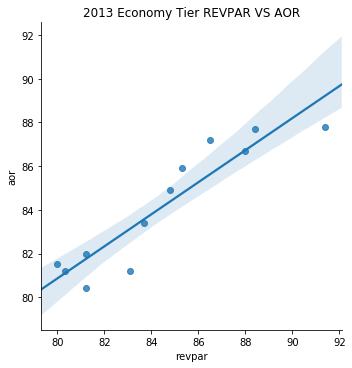

In [54]:
#2013_Economy
import matplotlib.pyplot as plt
import seaborn as sns

sns.lmplot(x='revpar', y='aor',data=period2013_economy_df,fit_reg=True)
plt.title('2013 Economy Tier REVPAR VS AOR')
plt.show()

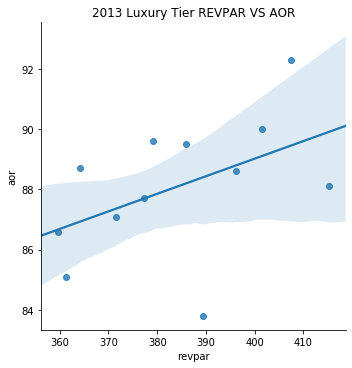

In [55]:
#2013_Luxury
sns.lmplot(x='revpar', y='aor',data=period2013_lux_df,fit_reg=True)
plt.title('2013 Luxury Tier REVPAR VS AOR')
plt.show()

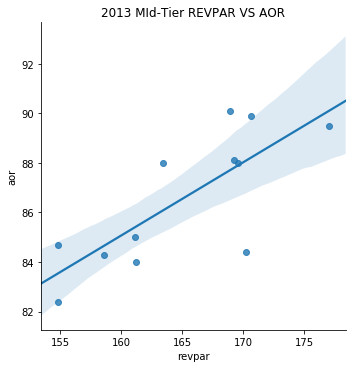

In [56]:
#2013_Mid-Tier
sns.lmplot(x='revpar', y='aor',data=period2013_mid_df,fit_reg=True)
plt.title('2013 MId-Tier REVPAR VS AOR')
plt.show()

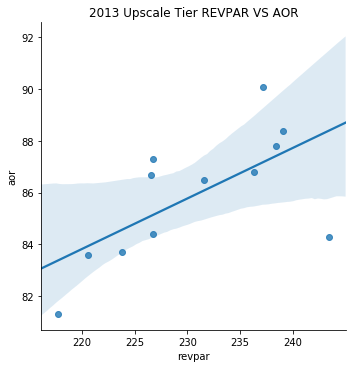

In [57]:
#2013_Upscale
sns.lmplot(x='revpar', y='aor',data=period2013_up_df,fit_reg=True)
plt.title('2013 Upscale Tier REVPAR VS AOR')
plt.show()

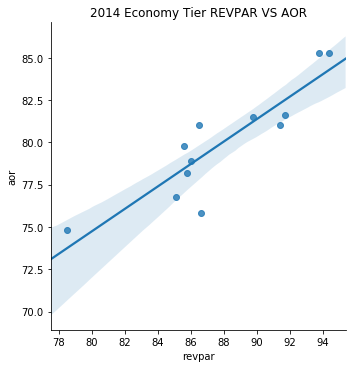

In [58]:
#2014_Economy
sns.lmplot(x='revpar', y='aor',data=period2014_economy_df,fit_reg=True)
plt.title('2014 Economy Tier REVPAR VS AOR')
plt.show()

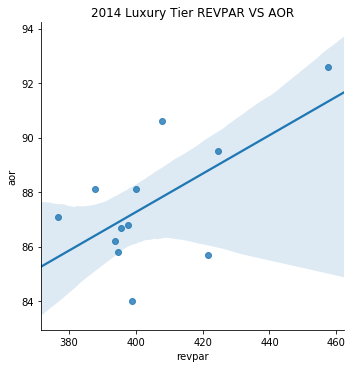

In [59]:
#2014_Luxury
sns.lmplot(x='revpar', y='aor',data=period2014_lux_df,fit_reg=True)
plt.title('2014 Luxury Tier REVPAR VS AOR')
plt.show()

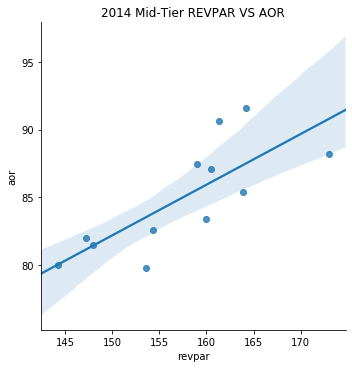

In [60]:
#2014_Mid-Tier
sns.lmplot(x='revpar', y='aor',data=period2014_mid_df,fit_reg=True)
plt.title('2014 Mid-Tier REVPAR VS AOR')
plt.show()

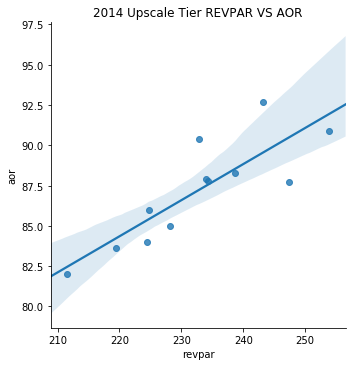

In [61]:
#2014_Upscale
sns.lmplot(x='revpar', y='aor',data=period2014_up_df,fit_reg=True)
plt.title('2014 Upscale Tier REVPAR VS AOR')
plt.show()

#### <u>Average Occupancy Rate (AOR) Regression in predicting RevPAR in 2014, Economy Tier</u>

In [62]:
from sklearn import datasets, linear_model

# Step 1 & 2
regr = linear_model.LinearRegression()


# Step 3
X = period2014_economy_df[['aor']]  # << Must use 2 square brackets
y = period2014_economy_df[['revpar']] # << Must use 2 square brackets

# Step 4
regr.fit(X,y)

LinearRegression()

In [63]:
regr.predict([[75.2]]) 

array([[82.19294118]])

In [64]:
print(regr.coef_)
print(regr.intercept_)

[[1.19591503]]
[-7.73986928]


In [65]:
from sklearn.model_selection import train_test_split
period2014_economy_revpar = period2014_economy_df[['revpar']] # << must be a DataFrame (NOT housing['sqft_living'])
period2014_economy_aor = period2014_economy_df[['aor']]
X_train, X_test, y_train, y_test = train_test_split(period2014_economy_aor, period2014_economy_revpar, random_state=0)

In [66]:
period2014_economy_lr = linear_model.LinearRegression()

period2014_economy_lr.fit(X_train, y_train)

LinearRegression()

In [67]:
print(period2014_economy_lr.coef_)
print(period2014_economy_lr.intercept_)
# revpar = -13.05862714 + 1.26478957(aor)
# For every increase in aor, revpar decreases by $13.05862714

[[1.26478957]]
[-13.05862714]


In [68]:
custom_period2014_economy_aor = 78.9

period2014_economy_lr.predict([[custom_period2014_economy_aor]]) # IMPORTANT - It's a nested list 

array([[86.7332701]])

In [69]:
from sklearn.metrics import r2_score 
fitted_values = period2014_economy_lr.predict(X_test)

print(r2_score(y_test, fitted_values))

0.8095433283942227


### Concluding Statement and Insights

RevPAR influenced by Room rate and Occupancy rate are generally all the highest for all hotel tiers in Q3. This also corresponds with the higher arrival count from Asia and Oceania in Q3 in which Asia arrival count to Singapore in general is significant out of all the other regions.<p>
The higher arrival count in Q3 in particular could also be attributed to the Singapore Formula One (F1) Grand Prix event held in Q3 every year which typically delivers a fillip for the tourism industry, as 40 per cent of racegoers generally hail from overseas. Hotel rates for the F1 season also take into account the approximate 30 per cent government levy imposed on all trackside hotels with non-circuit facing hotels riding the wave of demand as well.<p>
The lower demand from regions such as Europe and America in Q2 seems to correspond with the lower occupancy and room rates for Luxury and Upscale hotels. Whilst the lower demand for Asia corresponds to lower occupancy and room rates for Economy and Mid-tier hotels. This could reflect that the general demographic for Luxury and Upscale hotels are from Europe whilst general demographic for Economy hotels are from Asia.<p>
With the above insights, the hotel manager and sales and marketing team can plan events and promotions in boosting sales in Q3 and cater to different demographic groups for various hotel tiers.
